In [2]:
# Import Dependencies (İlk öncelikle kullanılacak olan kütüphanelerin yüklenilmesi gerekir)
%matplotlib inline

# Start Python Imports (python içerisinde bulunan temel kütüphaneler)
import math, time, random, datetime

# Data Manipulation (Veri üzerinsde işlem yapmak için kullanılan) kütüphaneler
import numpy as np
import pandas as pd

# Visualization (Veriyi görüntülemek için kullanılan) kütüphaneler
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing (Veriyi ön işleme) kütüphaneleri
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning (Makine öğrenmesi) kütüphaneleri
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
# Bir uyarı mesajı gelirse bu kısımda bunu göz ardı edebiliriz.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import train & test data 
# Kullanılacak verilerin sisteme yüklenilmesi gerekir.
# Tüm verileri data adlı bir klasörde tutuyoruz ve bu klasörden verileri çekiyoruz
# Verileri yüklerken pands csv dosyalrını okuyarak atadığımız değişkenlere kaydediyor
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv') # example of what a submission should look like
# gender_submission.csv ise kaggle platformuna yükleyeceğimiz sonuçları barındıracak

In [4]:
# View the training data
# Verinin yüklenip yüklenmediğini kontrol için 
# bize sadece "ilk" 15 satırı döndürecek olan head komutunu train verisi üzerinde kullanalım.
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Tüm train dosyasındaki veri sayısını öğrenmek için "len" komutunu kullanabiliriz
len(train)

891

In [6]:
# View the test data (same columns as the training data)
# Şimdi aynı işlemi test verisi üzerinde yapabiliriz. Bu sefer head fonksiyonuna parametre olarak bir sayı girmiyoruz.
# Bu nedenle bize ilk beş satır dönmüş olucak.
test.head() # head = view first 5 lines

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
len(test)

418

In [8]:
# View the example submisison dataframe
# submission.csv nin dataframe örneği:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Data Descriptions
Survival: 0 = No, 1 = Yes

pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd

sex: Sex

Age: Age in years

sibsp: number of siblings/spouses aboard the Titanic

parch: number of parents/children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

# Verilerin Anlamı
Survival: 0 = Hayatta kalmamış, 1 = Hayatta kalmış

pclass (Ticket class): 1 = 1.sınıf bilete sahip, 2 = 2.sınıf, 3 = 3.sınıf

sex: Cinsiyet

Age: Kaç yaşında olduğu

sibsp: kardeş ve eşlerin sayısı

parch: anne baba veya çocuklarının sayısı

ticket: bilet numarası

fare: yolcu ücreti

cabin: kabin numarası
 
embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton // gemiye binilen yer

In [9]:
"""
Train verisetimizdeki tüm verilerin toplam, ortalama, standart sapması gibi değerlere bakarak veri üzerinde
yorum yapmamızı sağlaması için pandas dataframe'i üzerinde descirbe() metodunu kullanıyoruz.  
"""
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# What missing values are there?
Where are the holes in our data?

These are rows which are missing a value or have NaN instead of something like the rest of the column.

# Verilerin Eksik Olup Olmadığını Kontrol Et

Kayıp verilerin nerede olduğunu tespit etmek için "missingno" adlı kütüphanenin matrix fonksiyonunu kullanıyoruz.
Kayıp olan veya Nan yazan sütünları beyaz renkte görerek kayıp verilerin hangi sütünlarda olduğunu tespit edebiliyor olacağız.

<AxesSubplot:>

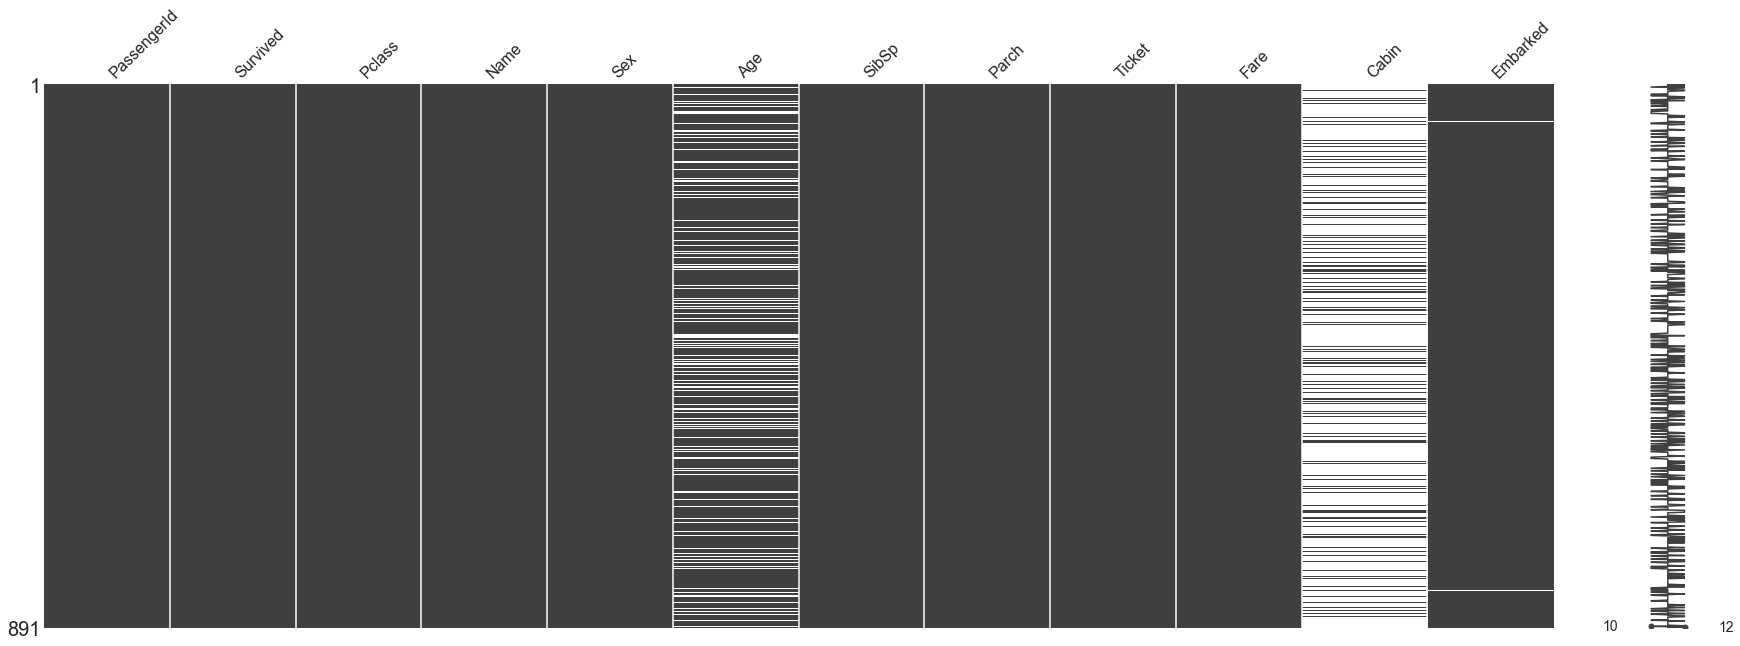

In [10]:
# Plot graphic of missing values
# Eksik verilerin grafiğini çizdir.
# train : eksik verilerin bulunduğu veriseti
# figsize = (width height) -> çizilecek olan grafiğin enlem boylamını belirler
missingno.matrix(train, figsize = (30,10))

Görüldüğü üzere "Age" ve "Cabin" sütünlarında eksik olan verilerin bulunduğunu bu grafik sayesinde anlayabiliyoruz.

In [22]:
# train veri setindeki her bir sütün için eksik olan verilerin toplam sayısını bulmak için aşağıdaki kodu çalıştırabilriz
missing_values = train.isnull().sum()  
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# isnull fonksiyonu bize tablodaki tüm verileri için null ise True null değilse False olan değerler üretiyor.
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# To perform our data analysis, let's create two new dataframes
We'll create one for exploring discretised continuous variables (continuous variables which have been sorted into some kind of category) and another for exploring continuous variables.

# Veri analizi yapabilmek için iki adet dataframe oluşturulması
İlk dataframe bize belli bir kategoriye göre sıralanmış değişkenleri barındıracak.
İkinci dataframe ise başka değişkenleri keşfetmek için kullanıcağımız bir dataframe olacak.
İki dataframede de bulunacak olan değişkenler "continous" veriler olacak. Yani belirli bir değer aralığında olacaklar.

In [13]:
df_bin = pd.DataFrame() # for discretised continuous variables (İlk dataframe)
df_con = pd.DataFrame() # for continuous variables (İkinci dataframe)

# What datatypes are in the dataframe?
As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

However, as we dig deeper, we might find features which are numerical may actually be categorical.

The goal for the next few steps is to figure out how best to process the data so our machine learning model can learn from it.

Ideally, all the features will be encoded into a numerical value of some kind.

# Dataframe'deki veri tipleri nelerdir?
Bir veri setindeki verilerin tiplerini öğrenmek için "dtypes" özelliğini kullanabiliriz.

In [14]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Let's explore each of these features individually
### Target Feature: Survived
Description: Whether the passenger survived or not.

Key: 0 = did not survive, 1 = survived

This is the variable we want our machine learning model to predict based off all the others.

0    549
1    342
Name: Survived, dtype: int64


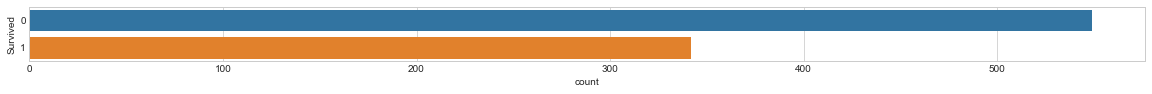

In [15]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived',data=train)
print(train.Survived.value_counts())

In [16]:
# Let's add this colum to our subset dataframes
# Önceden farklı amaçlarla kullanmak için oluşturduğumuz dataframe'lere Survived bilgisini ekliyoruz.
df_bin["Survived"] = train["Survived"]
df_con["Survived"] = train["Survived"]

In [17]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [18]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# Feature: Pclass
Description: The ticket class of the passenger.

Key: 1 = 1st, 2 = 2nd, 3 = 3rd

### Let's plot the distribution
We will look at the distribution of each feature first if we can to understand what kind of spread there is across the dataset.

For example, if there are values which are completely outside of the distribution, we may not want to include them in our model.

# Özellik : Pclass

Bir feature'da (özellikte) bulunan verilerin birbiri ile ilişkilerini incelemek için distplot fonksiyonunu kullanıyoruz. Böylelikle bir veri diğerlerinden çok uzakta bir yerde ise bu veriyi "outlier" olarak ele alabilir ve ilerde kullanıcağımız modele girdi olarak vermekten vazgeçerek daha gerçekçi bir model oluşturabiliriz. Bu nedenle distplot veriler arasındaki mesafeleri ölçerek bize görsel bir grafik sağlar.

## QUESTION 1:
### What is outlier?

## QUESTION 2:
### What is nominal and ordinal?

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

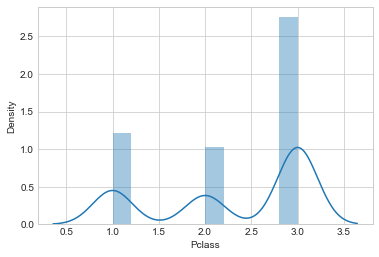

In [19]:
sns.distplot(train.Pclass)

We can see with this feature, the values are numerical (1, 2 and 3) but they are categories.

How do we know this? Because a passenger in Class 3 doesn't necessarily equal a passenger in Class 2 + a passenger in Class 1.

In [23]:
missing_values['Pclass']

0

Pclass özelliğinde hiçbir eksik verimiz bulunmadığından dolayı bu sütunu oluşturduğumuz iki adet dataframe'e ekleyebiliriz.

In [25]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

# Feature: Name
Description: The name of the passenger.

In [26]:
# How many different names are there?
train.Name.value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

Every row has a unique name. This is equivalent to the passenger ID. But name could be used differently.

Can you think of ways you could reduce the number of different names? Or create new features out of the names?

Note: Because of so many different names and to keep this EDA fast, we won't move forward using the name variable.

## Challenge 1!
If you have Mr. put number 1, Miss number 2 and for Mrs number 3 and so on in a different column.

## Feature: Sex
Description: The sex of the passenger (male or female).

<AxesSubplot:xlabel='count', ylabel='Sex'>

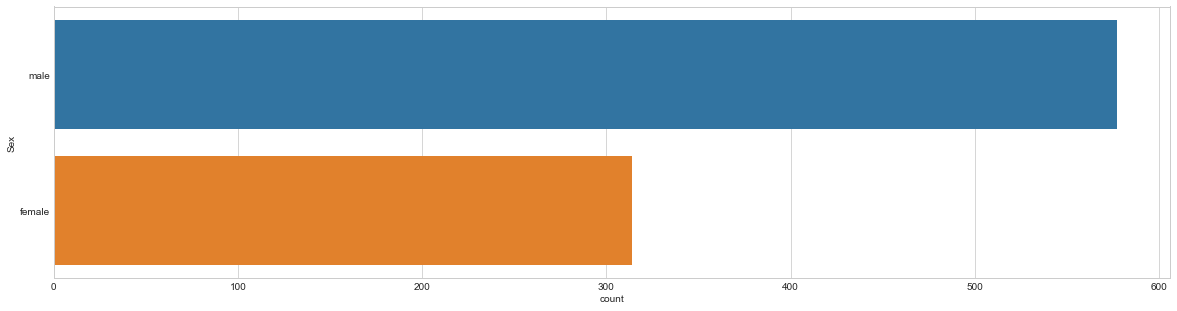

In [27]:
plt.figure(figsize=(20,5))
sns.countplot(y='Sex', data=train)

In [28]:
missing_values["Sex"]

0

In [29]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [31]:
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female',1,0)

df_con['Sex'] = train['Sex']

In [34]:
df_con

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male
...,...,...,...
886,0,2,male
887,1,1,female
888,0,3,female
889,1,1,male


In [35]:
df_bin

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0
...,...,...,...
886,0,2,0
887,1,1,1
888,0,3,1
889,1,1,0


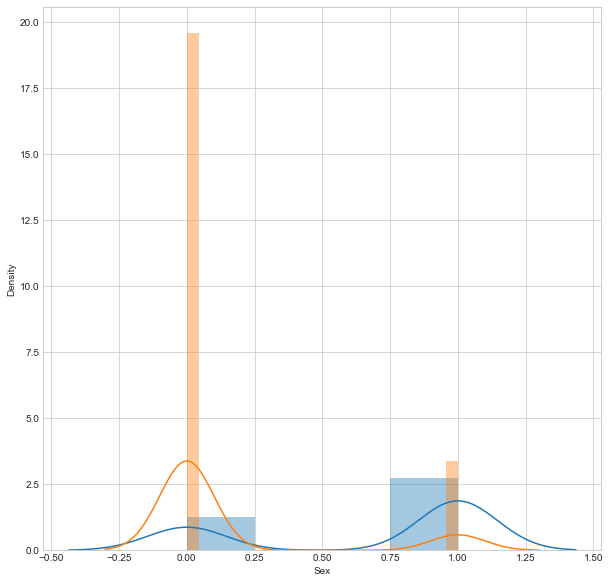

In [39]:
# Survival ve sex özelliklerinin ikiside binary olduklarından dolayı bu iki özellik arasındaki iliişkiyi distplot
# kullanarak gözlemleyebiliriz.
fig = plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin["Survived"] == 1]['Sex'],kde_kws={'label':'Survived'})
sns.distplot(df_bin.loc[df_bin["Survived"] == 0]['Sex'],kde_kws={'label':'Did not survive'})

## Challenge 2!
Improve the scale the graph above. Make the columns closer.

Yukarıdaki grafikten hayatta kalanların daha çok kadınlar olduğunu gözlemleyebiliyoruz.

## Feature: Age
Description: The age of the passenger.

In [42]:
missing_values["Age"]

177

Out of a total 891 rows, that's almost one quarter of the dataset.

What would you do with these missing values?

Could replace them with the average age? What's the pro's and con's of doing this?

Or would you get rid of them completely?

We won't answer these questions in our initial EDA but this is something we would definitely revisit at a later date.

## Challenge 3!
How would you fill missing values in Age column?

In [ ]:
# Once the Age values have been fixed up, we can add them to our sub dataframes.
# df_bin['Age'] = pd.cut(train['Age'], 10) # bucketed/binned into different categories
# df_con['Age'] = train['Age'] # non-bucketed

Function to create count and distribution visualisations

In [43]:
# İki farklı grafik türünü yan yana gösterir
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

## Feature: SibSp
Description: The number of siblings/spouses the passenger has aboard the Titanic.

In [44]:
missing_values["SibSp"]

0

In [45]:
# What values are there?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [46]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

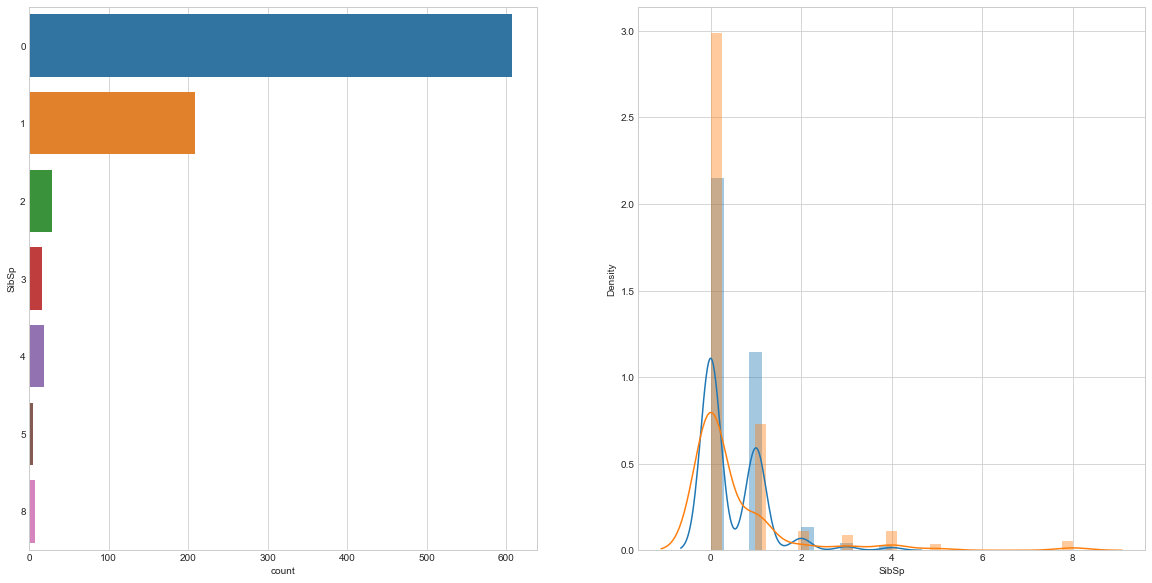

In [47]:
plot_count_dist(train,
               bin_df=df_bin,
               label_column='Survived',
               target_column='SibSp',
               figsize=(20,10)
               )

## Feature: Parch
Description: The number of parents/children the passenger has aboard the Titanic.

Since this feature is similar to SibSp, we'll do a similar analysis.

In [49]:
missing_values["SibSp"]

0

In [50]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [48]:
# Add SibSp to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

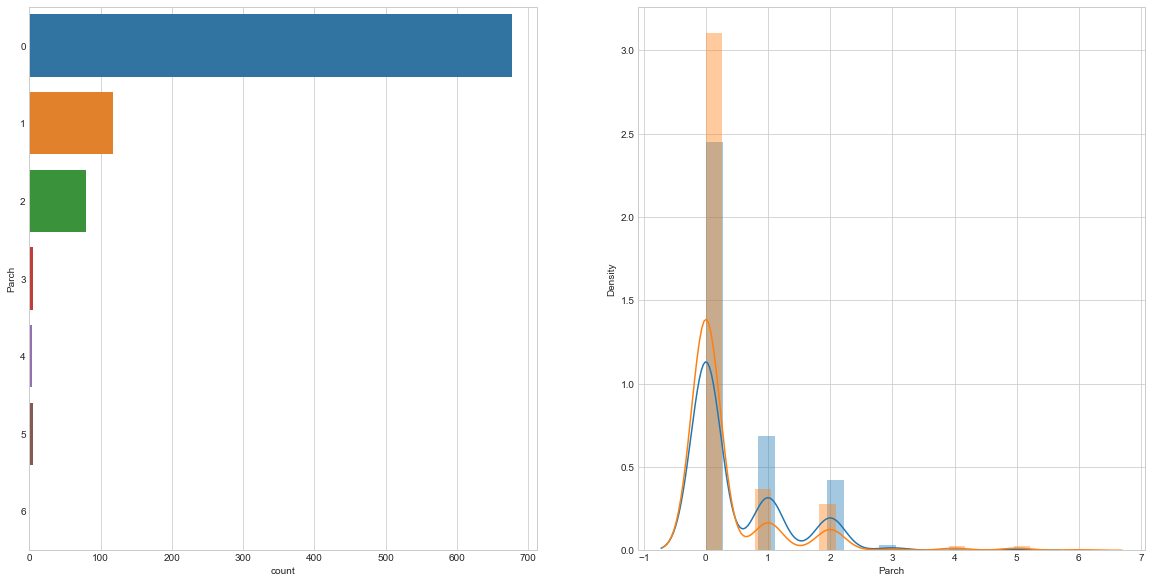

In [51]:
plot_count_dist(train,
               bin_df=df_bin,
               label_column='Survived',
               target_column='Parch',
               figsize=(20,10)
               )

In [52]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


## Feature: Ticket
Description: The ticket number of the boarding passenger.

In [53]:
train.Ticket.isnull().sum()

0

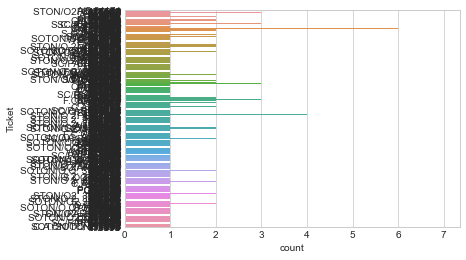

In [54]:
# How many kinds of ticket are there?
sns.countplot(y="Ticket", data=train);

In [55]:
# How many kinds of ticket are there?
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [56]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


In [57]:
print("{} tane özel bilet var.".format(len(train.Ticket.unique())))

681 tane özel bilet var.


There are 681 unique Ticket values.
681 unique values is too many for now. So we won't use Ticket in our subset dataframes.

There may be some way to reduce this down.

## Challenge4 !

### How could you reduce the Ticket feature? Is it even possible?

Hint: It may be similar to what you could do with Name.

## Feature: Fare
Description: How much the ticket cost.

In [58]:
train.Fare.isnull().sum()

0

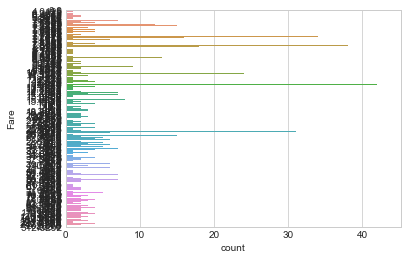

In [59]:
sns.countplot(y="Fare", data=train);

In [60]:
train.Fare.dtype

dtype('float64')

In [61]:
# How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


Because Fare is a float (number) let's add it as it is to our continuous sub dataframe but to add it to our categorical sub dataframe, we'll cut it into bins.

In [70]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised 
# pd.cut -> continous variable to categorical variable
# To learn more about cut :
# check website : https://pandas.pydata.org/docs/reference/api/pandas.cut.html

In [65]:
df_con.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [63]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

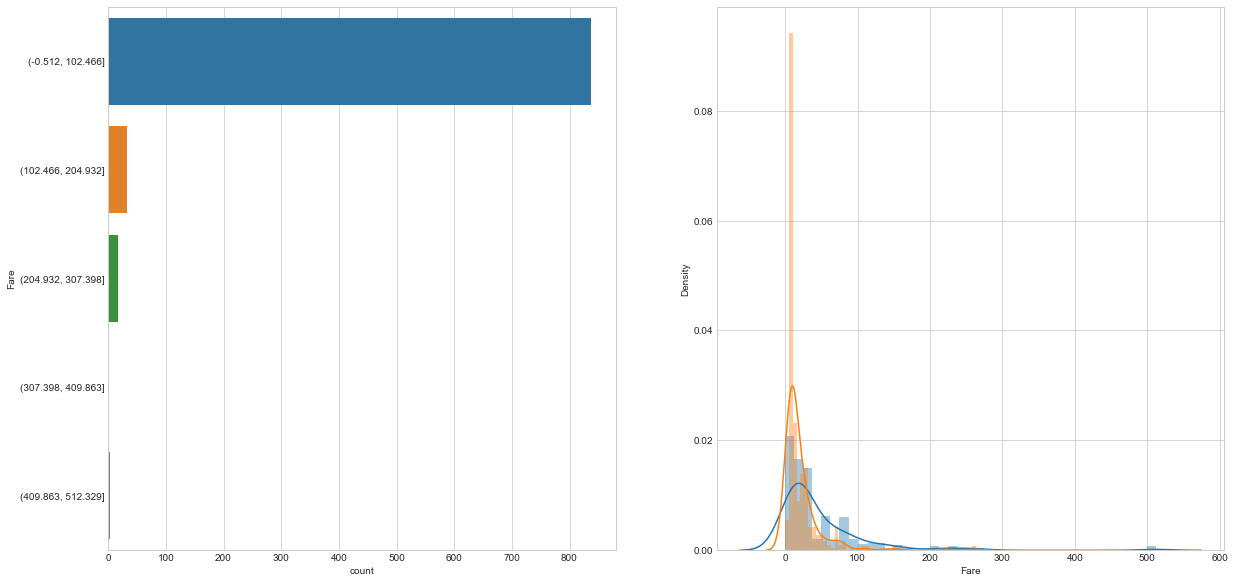

In [69]:
# Visualise the Fare bin counts as well as the Fare distribution versus Survived.
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

Challenge: How would you change the Fare bins?

## Feature: Cabin
Description: The cabin number where the passenger was staying.

In [71]:
train.Cabin.isnull().sum()

687

In [77]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [73]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Since there are too many missing values, we won't use Cabin for our initial models and won't add it to our sub dataframes.

But how could you modify cabin to be more usable?

What could you do about the missing values?

## Feature: Embarked
Description: The port where the passenger boarded the Titanic.

Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [78]:
train.Embarked.isnull().sum()

2

In [79]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

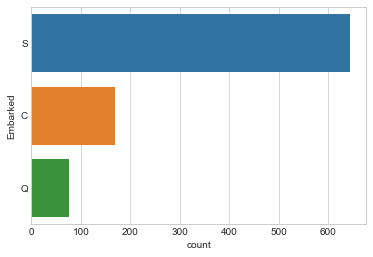

In [80]:
# Embarked özelliği kategorileştirilmiş olduğundan dolayı ek olarak bir işleme gerek kalmamaktadır.
sns.countplot(y='Embarked', data=train);

### How can we deal with the 2 missing values of Embarked?
One option is to drop the two rows which don't have an Embarked value.

Another option would be to randomly assign a value of C, Q or S to each row.

What are the pros and cons of each?

For now, we will remove those rows.

In [82]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']
# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))
# Burada train verimiz üzerinde işlem yapmıyoruz. Çünkü her zaman verinin saf haline ihtiyacımız olabilir.

891
889


In [85]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [83]:
df_con

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S
887,1,1,female,0,0,30.0000,S
888,0,3,female,1,2,23.4500,S
889,1,1,male,0,0,30.0000,C


In [84]:
df_bin

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S
...,...,...,...,...,...,...,...
886,0,2,0,0,0,"(-0.512, 102.466]",S
887,1,1,1,0,0,"(-0.512, 102.466]",S
888,0,3,1,1,2,"(-0.512, 102.466]",S
889,1,1,0,0,0,"(-0.512, 102.466]",C


# Feature Encoding
Now we have our two sub dataframes ready. We can encode the features so they're ready to be used with our machine learning models.

We will encode our binned dataframe (df_bin) with one-hot encoding and our continuous dataframe (df_con) with the label encoding function from sklearn.

In [87]:
one_hot_cols = df_bin.columns.to_list()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

In [88]:
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Burada featurelar için LabelEncoder() kullanılabilir fakat OneHotEncoder'ın daha iyi olduğuna şu makaleden bakabiliriz:
https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621

In [96]:
# Kategorize sütunlar için one hot encode : 
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'],prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'],prefix='sex')

df_pclass_one_hot = pd.get_dummies(df_con['Pclass'],prefix='pclass')

In [97]:
# One hot encode edilmiş sütunları birleştirmemiz gerekiyor
df_con_enc = pd.concat([df_con,
                       df_embarked_one_hot,
                       df_sex_one_hot,
                       df_pclass_one_hot], axis=1)
# Bundan sonrada orijinal verileri kaldırabiliriz
df_con_enc = df_con_enc.drop(['Pclass','Sex','Embarked'],axis=1)

In [99]:
df_con_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


# Start Building Machine Learning Models
Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

In [100]:
selected_df = df_con_enc

In [104]:
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [101]:
# Dataframe'i veri ve label (etiket) olmak üzere ikiye ayır.
X_train = selected_df.drop('Survived',axis=1) # data yani bizim modele eğitim için vereceğimiz verilerdir.
y_train = selected_df.Survived # Verilerin çıktısı olarak Survived sütünu kullanılır.


In [102]:
X_train.shape

(889, 11)

In [105]:
y_train.shape

(889,)

## Define a function to fit machine learning algorithms
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [107]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

## Logistic Regression

In [108]:
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:03.865941


## K-Nearest Neighbours

In [109]:
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 80.2
Accuracy CV 10-Fold: 75.59
Running Time: 0:00:02.270926


## Gaussian Naive Bayes

In [110]:
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.039857


## Linear Support Vector Machines (SVC)

In [112]:
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 67.49
Accuracy CV 10-Fold: 77.05
Running Time: 0:00:00.147656


## Stochastic Gradient Descent

In [113]:
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 77.62
Accuracy CV 10-Fold: 71.43
Running Time: 0:00:00.042882


## Decision Tree Classifier

In [114]:
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.2
Running Time: 0:00:00.071810


## Gradient Boost Trees 

In [115]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:00.462765


CatBoost Algorithm
CatBoost is a state-of-the-art open-source gradient boosting on decision trees library.

It's simple and easy to use. And is now regularly one of my go-to algorithms for any kind of machine learning task.

For more on CatBoost and the methods it uses to deal with categorical variables, check out the CatBoost docs.

In [116]:
# View the data for the CatBoost model
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [117]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [118]:
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

This means Catboost has picked up that all variables except Fare can be treated as categorical.

In [119]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [120]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [121]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6862830	total: 90ms	remaining: 1m 29s
1:	learn: 0.6809444	total: 114ms	remaining: 56.7s
2:	learn: 0.6751692	total: 135ms	remaining: 44.8s
3:	learn: 0.6689060	total: 157ms	remaining: 39s
4:	learn: 0.6632144	total: 179ms	remaining: 35.6s
5:	learn: 0.6576488	total: 200ms	remaining: 33.2s
6:	learn: 0.6544441	total: 210ms	remaining: 29.8s
7:	learn: 0.6490635	total: 235ms	remaining: 29.1s
8:	learn: 0.6443241	total: 256ms	remaining: 28.2s
9:	learn: 0.6395935	total: 279ms	remaining: 27.6s
10:	learn: 0.6345186	total: 296ms	remaining: 26.6s
11:	learn: 0.6305316	total: 316ms	remaining: 26s
12:	learn: 0.6275610	total: 326ms	remaining: 24.8s
13:	learn: 0.6225020	total: 346ms	remaining: 24.4s
14:	learn: 0.6179503	total: 370ms	remaining: 24.3s
15:	learn: 0.6140480	total: 380ms	remaining: 23.4s
16:	learn: 0.6100034	total: 396ms	remaining: 22.9s
17:	learn: 0.6049646	total: 422ms	remaining: 23s
18:	learn: 0.6025760	total: 432ms	remaining: 22.3s
19:	learn: 0.5998

164:	learn: 0.4228926	total: 3.85s	remaining: 19.5s
165:	learn: 0.4227463	total: 3.87s	remaining: 19.5s
166:	learn: 0.4226186	total: 3.9s	remaining: 19.4s
167:	learn: 0.4222141	total: 3.92s	remaining: 19.4s
168:	learn: 0.4219366	total: 3.95s	remaining: 19.4s
169:	learn: 0.4216245	total: 3.98s	remaining: 19.4s
170:	learn: 0.4213900	total: 4s	remaining: 19.4s
171:	learn: 0.4210836	total: 4.03s	remaining: 19.4s
172:	learn: 0.4208199	total: 4.06s	remaining: 19.4s
173:	learn: 0.4206421	total: 4.08s	remaining: 19.4s
174:	learn: 0.4201114	total: 4.11s	remaining: 19.4s
175:	learn: 0.4198212	total: 4.13s	remaining: 19.4s
176:	learn: 0.4195834	total: 4.15s	remaining: 19.3s
177:	learn: 0.4195685	total: 4.16s	remaining: 19.2s
178:	learn: 0.4194809	total: 4.17s	remaining: 19.1s
179:	learn: 0.4191368	total: 4.19s	remaining: 19.1s
180:	learn: 0.4185960	total: 4.21s	remaining: 19.1s
181:	learn: 0.4184559	total: 4.23s	remaining: 19s
182:	learn: 0.4180542	total: 4.25s	remaining: 19s
183:	learn: 0.417857

325:	learn: 0.3930115	total: 8.07s	remaining: 16.7s
326:	learn: 0.3929436	total: 8.09s	remaining: 16.7s
327:	learn: 0.3928210	total: 8.11s	remaining: 16.6s
328:	learn: 0.3926321	total: 8.14s	remaining: 16.6s
329:	learn: 0.3926315	total: 8.16s	remaining: 16.6s
330:	learn: 0.3925085	total: 8.21s	remaining: 16.6s
331:	learn: 0.3921820	total: 8.25s	remaining: 16.6s
332:	learn: 0.3920570	total: 8.31s	remaining: 16.6s
333:	learn: 0.3918707	total: 8.35s	remaining: 16.7s
334:	learn: 0.3917635	total: 8.38s	remaining: 16.6s
335:	learn: 0.3916127	total: 8.4s	remaining: 16.6s
336:	learn: 0.3914735	total: 8.42s	remaining: 16.6s
337:	learn: 0.3914486	total: 8.45s	remaining: 16.5s
338:	learn: 0.3912764	total: 8.47s	remaining: 16.5s
339:	learn: 0.3911365	total: 8.49s	remaining: 16.5s
340:	learn: 0.3910828	total: 8.53s	remaining: 16.5s
341:	learn: 0.3910413	total: 8.58s	remaining: 16.5s
342:	learn: 0.3910351	total: 8.61s	remaining: 16.5s
343:	learn: 0.3908388	total: 8.64s	remaining: 16.5s
344:	learn: 0

487:	learn: 0.3777238	total: 12.7s	remaining: 13.3s
488:	learn: 0.3776655	total: 12.7s	remaining: 13.3s
489:	learn: 0.3776178	total: 12.8s	remaining: 13.3s
490:	learn: 0.3775500	total: 12.8s	remaining: 13.3s
491:	learn: 0.3774361	total: 12.9s	remaining: 13.3s
492:	learn: 0.3772670	total: 12.9s	remaining: 13.3s
493:	learn: 0.3771396	total: 13s	remaining: 13.3s
494:	learn: 0.3771236	total: 13s	remaining: 13.3s
495:	learn: 0.3770363	total: 13.1s	remaining: 13.3s
496:	learn: 0.3769634	total: 13.1s	remaining: 13.3s
497:	learn: 0.3769625	total: 13.1s	remaining: 13.2s
498:	learn: 0.3768613	total: 13.2s	remaining: 13.2s
499:	learn: 0.3768611	total: 13.2s	remaining: 13.2s
500:	learn: 0.3768153	total: 13.2s	remaining: 13.2s
501:	learn: 0.3767849	total: 13.3s	remaining: 13.2s
502:	learn: 0.3765500	total: 13.3s	remaining: 13.1s
503:	learn: 0.3763980	total: 13.3s	remaining: 13.1s
504:	learn: 0.3763692	total: 13.4s	remaining: 13.1s
505:	learn: 0.3763085	total: 13.4s	remaining: 13.1s
506:	learn: 0.37

648:	learn: 0.3649679	total: 17.5s	remaining: 9.45s
649:	learn: 0.3649577	total: 17.5s	remaining: 9.43s
650:	learn: 0.3648289	total: 17.6s	remaining: 9.41s
651:	learn: 0.3647326	total: 17.6s	remaining: 9.39s
652:	learn: 0.3644740	total: 17.6s	remaining: 9.36s
653:	learn: 0.3644317	total: 17.6s	remaining: 9.34s
654:	learn: 0.3644178	total: 17.7s	remaining: 9.3s
655:	learn: 0.3642661	total: 17.7s	remaining: 9.27s
656:	learn: 0.3642146	total: 17.7s	remaining: 9.24s
657:	learn: 0.3642143	total: 17.7s	remaining: 9.21s
658:	learn: 0.3641970	total: 17.7s	remaining: 9.18s
659:	learn: 0.3641835	total: 17.7s	remaining: 9.14s
660:	learn: 0.3641783	total: 17.8s	remaining: 9.11s
661:	learn: 0.3640790	total: 17.8s	remaining: 9.08s
662:	learn: 0.3640602	total: 17.8s	remaining: 9.05s
663:	learn: 0.3639463	total: 17.8s	remaining: 9.02s
664:	learn: 0.3639302	total: 17.9s	remaining: 8.99s
665:	learn: 0.3638903	total: 17.9s	remaining: 8.97s
666:	learn: 0.3637239	total: 17.9s	remaining: 8.94s
667:	learn: 0

815:	learn: 0.3534753	total: 21.2s	remaining: 4.78s
816:	learn: 0.3534687	total: 21.2s	remaining: 4.75s
817:	learn: 0.3534612	total: 21.2s	remaining: 4.72s
818:	learn: 0.3533902	total: 21.2s	remaining: 4.7s
819:	learn: 0.3533072	total: 21.3s	remaining: 4.67s
820:	learn: 0.3532730	total: 21.3s	remaining: 4.64s
821:	learn: 0.3531556	total: 21.3s	remaining: 4.61s
822:	learn: 0.3531526	total: 21.3s	remaining: 4.59s
823:	learn: 0.3530893	total: 21.3s	remaining: 4.56s
824:	learn: 0.3528000	total: 21.4s	remaining: 4.53s
825:	learn: 0.3527557	total: 21.4s	remaining: 4.51s
826:	learn: 0.3527494	total: 21.4s	remaining: 4.48s
827:	learn: 0.3527097	total: 21.4s	remaining: 4.46s
828:	learn: 0.3525818	total: 21.5s	remaining: 4.43s
829:	learn: 0.3525719	total: 21.5s	remaining: 4.4s
830:	learn: 0.3523327	total: 21.5s	remaining: 4.37s
831:	learn: 0.3523023	total: 21.5s	remaining: 4.35s
832:	learn: 0.3522949	total: 21.5s	remaining: 4.32s
833:	learn: 0.3521358	total: 21.6s	remaining: 4.29s
834:	learn: 0.

975:	learn: 0.3415224	total: 24.7s	remaining: 608ms
976:	learn: 0.3415224	total: 24.7s	remaining: 582ms
977:	learn: 0.3414545	total: 24.7s	remaining: 556ms
978:	learn: 0.3413894	total: 24.8s	remaining: 531ms
979:	learn: 0.3413289	total: 24.8s	remaining: 506ms
980:	learn: 0.3412959	total: 24.8s	remaining: 480ms
981:	learn: 0.3412873	total: 24.8s	remaining: 455ms
982:	learn: 0.3411125	total: 24.8s	remaining: 430ms
983:	learn: 0.3410429	total: 24.9s	remaining: 404ms
984:	learn: 0.3408345	total: 24.9s	remaining: 379ms
985:	learn: 0.3407755	total: 24.9s	remaining: 354ms
986:	learn: 0.3405983	total: 24.9s	remaining: 328ms
987:	learn: 0.3404887	total: 24.9s	remaining: 303ms
988:	learn: 0.3404766	total: 25s	remaining: 278ms
989:	learn: 0.3404401	total: 25s	remaining: 253ms
990:	learn: 0.3403797	total: 25s	remaining: 227ms
991:	learn: 0.3403515	total: 25s	remaining: 202ms
992:	learn: 0.3402624	total: 25.1s	remaining: 177ms
993:	learn: 0.3402175	total: 25.1s	remaining: 151ms
994:	learn: 0.339993

###  Perform CatBoost cross-validation

In [123]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]
0:	learn: 0.6745162	test: 0.6767086	best: 0.6767086 (0)	total: 19.7ms	remaining: 19.6s
1:	learn: 0.6563735	test: 0.6625619	best: 0.6625619 (1)	total: 44.6ms	remaining: 22.3s
2:	learn: 0.6393665	test: 0.6503586	best: 0.6503586 (2)	total: 76.6ms	remaining: 25.4s
3:	learn: 0.6245037	test: 0.6386039	best: 0.6386039 (3)	total: 93.2ms	remaining: 23.2s
4:	learn: 0.6100945	test: 0.6265278	best: 0.6265278 (4)	total: 115ms	remaining: 22.8s
5:	learn: 0.5969007	test: 0.6166952	best: 0.6166952 (5)	total: 136ms	remaining: 22.6s
6:	learn: 0.5850695	test: 0.6078388	best: 0.6078388 (6)	total: 156ms	remaining: 22.1s
7:	learn: 0.5733859	test: 0.5982216	best: 0.5982216 (7)	total: 181ms	remaining: 22.5s
8:	learn: 0.5628595	test: 0.5914378	best: 0.5914378 (8)	total: 205ms	remaining: 22.6s
9:	learn: 0.5515334	test: 0.5834997	best: 0.5834997 (9)	total: 226ms	remaining: 22.4s
10:	learn: 0.5427606	test: 0.5765989	best: 0.5765989 (10)	total: 239ms	remaining: 21.5s
11:	learn: 0.5328784	tes

102:	learn: 0.3797088	test: 0.4885391	best: 0.4885391 (102)	total: 2.29s	remaining: 20s
103:	learn: 0.3797015	test: 0.4885401	best: 0.4885391 (102)	total: 2.31s	remaining: 19.9s
104:	learn: 0.3783232	test: 0.4871529	best: 0.4871529 (104)	total: 2.33s	remaining: 19.9s
105:	learn: 0.3782885	test: 0.4871386	best: 0.4871386 (105)	total: 2.35s	remaining: 19.8s
106:	learn: 0.3779293	test: 0.4871890	best: 0.4871386 (105)	total: 2.37s	remaining: 19.7s
107:	learn: 0.3771516	test: 0.4869702	best: 0.4869702 (107)	total: 2.38s	remaining: 19.7s
108:	learn: 0.3766740	test: 0.4868246	best: 0.4868246 (108)	total: 2.41s	remaining: 19.7s
109:	learn: 0.3766302	test: 0.4868956	best: 0.4868246 (108)	total: 2.42s	remaining: 19.6s
110:	learn: 0.3761930	test: 0.4865996	best: 0.4865996 (110)	total: 2.44s	remaining: 19.6s
111:	learn: 0.3758853	test: 0.4865728	best: 0.4865728 (111)	total: 2.46s	remaining: 19.5s
112:	learn: 0.3756645	test: 0.4865079	best: 0.4865079 (112)	total: 2.49s	remaining: 19.5s
113:	learn: 

197:	learn: 0.3551814	test: 0.4862507	best: 0.4846511 (188)	total: 4.68s	remaining: 19s
198:	learn: 0.3548815	test: 0.4860885	best: 0.4846511 (188)	total: 4.74s	remaining: 19.1s
199:	learn: 0.3548793	test: 0.4860890	best: 0.4846511 (188)	total: 4.75s	remaining: 19s
200:	learn: 0.3547621	test: 0.4860554	best: 0.4846511 (188)	total: 4.79s	remaining: 19.1s
201:	learn: 0.3543466	test: 0.4859695	best: 0.4846511 (188)	total: 4.83s	remaining: 19.1s
202:	learn: 0.3540871	test: 0.4860360	best: 0.4846511 (188)	total: 4.87s	remaining: 19.1s
203:	learn: 0.3539689	test: 0.4860137	best: 0.4846511 (188)	total: 4.92s	remaining: 19.2s
204:	learn: 0.3537186	test: 0.4860031	best: 0.4846511 (188)	total: 4.96s	remaining: 19.2s
205:	learn: 0.3535032	test: 0.4859917	best: 0.4846511 (188)	total: 5s	remaining: 19.3s
206:	learn: 0.3534786	test: 0.4860268	best: 0.4846511 (188)	total: 5.04s	remaining: 19.3s
207:	learn: 0.3532113	test: 0.4860941	best: 0.4846511 (188)	total: 5.06s	remaining: 19.3s
208:	learn: 0.353

297:	learn: 0.3303330	test: 0.4873508	best: 0.4846511 (188)	total: 7.54s	remaining: 17.8s
298:	learn: 0.3300321	test: 0.4879937	best: 0.4846511 (188)	total: 7.58s	remaining: 17.8s
299:	learn: 0.3299031	test: 0.4881196	best: 0.4846511 (188)	total: 7.6s	remaining: 17.7s
300:	learn: 0.3298716	test: 0.4881434	best: 0.4846511 (188)	total: 7.62s	remaining: 17.7s
301:	learn: 0.3295142	test: 0.4882257	best: 0.4846511 (188)	total: 7.64s	remaining: 17.7s
302:	learn: 0.3292586	test: 0.4885585	best: 0.4846511 (188)	total: 7.67s	remaining: 17.6s
303:	learn: 0.3289984	test: 0.4888135	best: 0.4846511 (188)	total: 7.69s	remaining: 17.6s
304:	learn: 0.3289548	test: 0.4888008	best: 0.4846511 (188)	total: 7.71s	remaining: 17.6s
305:	learn: 0.3288391	test: 0.4892172	best: 0.4846511 (188)	total: 7.73s	remaining: 17.5s
306:	learn: 0.3286770	test: 0.4892452	best: 0.4846511 (188)	total: 7.76s	remaining: 17.5s
307:	learn: 0.3281400	test: 0.4891986	best: 0.4846511 (188)	total: 7.78s	remaining: 17.5s
308:	learn:

389:	learn: 0.3052422	test: 0.4860075	best: 0.4846511 (188)	total: 9.93s	remaining: 15.5s
390:	learn: 0.3048362	test: 0.4862272	best: 0.4846511 (188)	total: 9.95s	remaining: 15.5s
391:	learn: 0.3048218	test: 0.4861523	best: 0.4846511 (188)	total: 9.98s	remaining: 15.5s
392:	learn: 0.3045643	test: 0.4859807	best: 0.4846511 (188)	total: 10s	remaining: 15.5s
393:	learn: 0.3042748	test: 0.4857216	best: 0.4846511 (188)	total: 10s	remaining: 15.4s
394:	learn: 0.3041282	test: 0.4859186	best: 0.4846511 (188)	total: 10.1s	remaining: 15.4s
395:	learn: 0.3039519	test: 0.4860370	best: 0.4846511 (188)	total: 10.1s	remaining: 15.4s
396:	learn: 0.3038344	test: 0.4860186	best: 0.4846511 (188)	total: 10.1s	remaining: 15.4s
397:	learn: 0.3033730	test: 0.4853184	best: 0.4846511 (188)	total: 10.1s	remaining: 15.3s
398:	learn: 0.3029848	test: 0.4853102	best: 0.4846511 (188)	total: 10.2s	remaining: 15.3s
399:	learn: 0.3026335	test: 0.4857926	best: 0.4846511 (188)	total: 10.2s	remaining: 15.3s
400:	learn: 0.

490:	learn: 0.2821873	test: 0.4838208	best: 0.4826818 (455)	total: 12.3s	remaining: 12.7s
491:	learn: 0.2817912	test: 0.4839452	best: 0.4826818 (455)	total: 12.3s	remaining: 12.7s
492:	learn: 0.2814836	test: 0.4840257	best: 0.4826818 (455)	total: 12.3s	remaining: 12.7s
493:	learn: 0.2813421	test: 0.4840126	best: 0.4826818 (455)	total: 12.4s	remaining: 12.7s
494:	learn: 0.2812481	test: 0.4840052	best: 0.4826818 (455)	total: 12.4s	remaining: 12.6s
495:	learn: 0.2811340	test: 0.4840457	best: 0.4826818 (455)	total: 12.4s	remaining: 12.6s
496:	learn: 0.2809129	test: 0.4836237	best: 0.4826818 (455)	total: 12.4s	remaining: 12.6s
497:	learn: 0.2808216	test: 0.4836126	best: 0.4826818 (455)	total: 12.4s	remaining: 12.5s
498:	learn: 0.2807722	test: 0.4836234	best: 0.4826818 (455)	total: 12.5s	remaining: 12.5s
499:	learn: 0.2805352	test: 0.4836213	best: 0.4826818 (455)	total: 12.5s	remaining: 12.5s
500:	learn: 0.2799978	test: 0.4835414	best: 0.4826818 (455)	total: 12.5s	remaining: 12.5s
501:	learn

589:	learn: 0.2668352	test: 0.4865217	best: 0.4826818 (455)	total: 14.6s	remaining: 10.1s
590:	learn: 0.2666508	test: 0.4863442	best: 0.4826818 (455)	total: 14.6s	remaining: 10.1s
591:	learn: 0.2665290	test: 0.4865648	best: 0.4826818 (455)	total: 14.6s	remaining: 10.1s
592:	learn: 0.2664344	test: 0.4866101	best: 0.4826818 (455)	total: 14.7s	remaining: 10.1s
593:	learn: 0.2663395	test: 0.4865529	best: 0.4826818 (455)	total: 14.7s	remaining: 10s
594:	learn: 0.2662292	test: 0.4873137	best: 0.4826818 (455)	total: 14.7s	remaining: 10s
595:	learn: 0.2661835	test: 0.4875082	best: 0.4826818 (455)	total: 14.7s	remaining: 9.99s
596:	learn: 0.2661224	test: 0.4875585	best: 0.4826818 (455)	total: 14.8s	remaining: 9.97s
597:	learn: 0.2657367	test: 0.4873961	best: 0.4826818 (455)	total: 14.8s	remaining: 9.95s
598:	learn: 0.2653883	test: 0.4867535	best: 0.4826818 (455)	total: 14.8s	remaining: 9.93s
599:	learn: 0.2652143	test: 0.4875156	best: 0.4826818 (455)	total: 14.9s	remaining: 9.9s
600:	learn: 0.2

687:	learn: 0.2519687	test: 0.4889617	best: 0.4826818 (455)	total: 17s	remaining: 7.7s
688:	learn: 0.2518829	test: 0.4889378	best: 0.4826818 (455)	total: 17s	remaining: 7.67s
689:	learn: 0.2517892	test: 0.4889362	best: 0.4826818 (455)	total: 17s	remaining: 7.65s
690:	learn: 0.2517330	test: 0.4891048	best: 0.4826818 (455)	total: 17s	remaining: 7.62s
691:	learn: 0.2516590	test: 0.4889897	best: 0.4826818 (455)	total: 17.1s	remaining: 7.6s
692:	learn: 0.2515284	test: 0.4892113	best: 0.4826818 (455)	total: 17.1s	remaining: 7.57s
693:	learn: 0.2513551	test: 0.4893955	best: 0.4826818 (455)	total: 17.1s	remaining: 7.54s
694:	learn: 0.2512459	test: 0.4898584	best: 0.4826818 (455)	total: 17.1s	remaining: 7.52s
695:	learn: 0.2508122	test: 0.4893269	best: 0.4826818 (455)	total: 17.2s	remaining: 7.49s
696:	learn: 0.2508086	test: 0.4892801	best: 0.4826818 (455)	total: 17.2s	remaining: 7.47s
697:	learn: 0.2507568	test: 0.4892457	best: 0.4826818 (455)	total: 17.2s	remaining: 7.45s
698:	learn: 0.250685

781:	learn: 0.2405871	test: 0.4890218	best: 0.4826818 (455)	total: 19.1s	remaining: 5.34s
782:	learn: 0.2403600	test: 0.4887417	best: 0.4826818 (455)	total: 19.2s	remaining: 5.32s
783:	learn: 0.2402008	test: 0.4889193	best: 0.4826818 (455)	total: 19.2s	remaining: 5.29s
784:	learn: 0.2399305	test: 0.4887337	best: 0.4826818 (455)	total: 19.2s	remaining: 5.26s
785:	learn: 0.2398575	test: 0.4887319	best: 0.4826818 (455)	total: 19.2s	remaining: 5.24s
786:	learn: 0.2397426	test: 0.4887456	best: 0.4826818 (455)	total: 19.3s	remaining: 5.21s
787:	learn: 0.2395383	test: 0.4889063	best: 0.4826818 (455)	total: 19.3s	remaining: 5.19s
788:	learn: 0.2393706	test: 0.4891079	best: 0.4826818 (455)	total: 19.3s	remaining: 5.16s
789:	learn: 0.2393370	test: 0.4890316	best: 0.4826818 (455)	total: 19.3s	remaining: 5.14s
790:	learn: 0.2391798	test: 0.4890866	best: 0.4826818 (455)	total: 19.4s	remaining: 5.11s
791:	learn: 0.2390665	test: 0.4890866	best: 0.4826818 (455)	total: 19.4s	remaining: 5.09s
792:	learn

874:	learn: 0.2294942	test: 0.4866252	best: 0.4826818 (455)	total: 21.3s	remaining: 3.04s
875:	learn: 0.2293574	test: 0.4866266	best: 0.4826818 (455)	total: 21.3s	remaining: 3.02s
876:	learn: 0.2293482	test: 0.4866842	best: 0.4826818 (455)	total: 21.4s	remaining: 2.99s
877:	learn: 0.2292399	test: 0.4867861	best: 0.4826818 (455)	total: 21.4s	remaining: 2.97s
878:	learn: 0.2291691	test: 0.4869274	best: 0.4826818 (455)	total: 21.4s	remaining: 2.94s
879:	learn: 0.2290961	test: 0.4868838	best: 0.4826818 (455)	total: 21.4s	remaining: 2.92s
880:	learn: 0.2290281	test: 0.4866529	best: 0.4826818 (455)	total: 21.4s	remaining: 2.9s
881:	learn: 0.2287510	test: 0.4865451	best: 0.4826818 (455)	total: 21.5s	remaining: 2.87s
882:	learn: 0.2286215	test: 0.4858748	best: 0.4826818 (455)	total: 21.5s	remaining: 2.85s
883:	learn: 0.2285106	test: 0.4858739	best: 0.4826818 (455)	total: 21.5s	remaining: 2.82s
884:	learn: 0.2283138	test: 0.4856078	best: 0.4826818 (455)	total: 21.5s	remaining: 2.8s
885:	learn: 

967:	learn: 0.2190903	test: 0.4843401	best: 0.4826818 (455)	total: 23.4s	remaining: 775ms
968:	learn: 0.2190178	test: 0.4845863	best: 0.4826818 (455)	total: 23.5s	remaining: 751ms
969:	learn: 0.2189363	test: 0.4845533	best: 0.4826818 (455)	total: 23.5s	remaining: 727ms
970:	learn: 0.2188412	test: 0.4846315	best: 0.4826818 (455)	total: 23.5s	remaining: 702ms
971:	learn: 0.2187657	test: 0.4850436	best: 0.4826818 (455)	total: 23.5s	remaining: 678ms
972:	learn: 0.2185642	test: 0.4852296	best: 0.4826818 (455)	total: 23.6s	remaining: 654ms
973:	learn: 0.2184607	test: 0.4853274	best: 0.4826818 (455)	total: 23.6s	remaining: 630ms
974:	learn: 0.2184487	test: 0.4854990	best: 0.4826818 (455)	total: 23.6s	remaining: 605ms
975:	learn: 0.2183717	test: 0.4854031	best: 0.4826818 (455)	total: 23.6s	remaining: 581ms
976:	learn: 0.2182619	test: 0.4854411	best: 0.4826818 (455)	total: 23.7s	remaining: 557ms
977:	learn: 0.2182150	test: 0.4855326	best: 0.4826818 (455)	total: 23.7s	remaining: 533ms
978:	learn

60:	learn: 0.4108670	test: 0.4564287	best: 0.4564287 (60)	total: 1.53s	remaining: 23.6s
61:	learn: 0.4107589	test: 0.4564668	best: 0.4564287 (60)	total: 1.56s	remaining: 23.7s
62:	learn: 0.4102687	test: 0.4564165	best: 0.4564165 (62)	total: 1.6s	remaining: 23.8s
63:	learn: 0.4095216	test: 0.4566351	best: 0.4564165 (62)	total: 1.63s	remaining: 23.8s
64:	learn: 0.4094928	test: 0.4566219	best: 0.4564165 (62)	total: 1.63s	remaining: 23.5s
65:	learn: 0.4094656	test: 0.4566100	best: 0.4564165 (62)	total: 1.64s	remaining: 23.2s
66:	learn: 0.4089147	test: 0.4561993	best: 0.4561993 (66)	total: 1.66s	remaining: 23.2s
67:	learn: 0.4076138	test: 0.4559983	best: 0.4559983 (67)	total: 1.69s	remaining: 23.1s
68:	learn: 0.4070922	test: 0.4560952	best: 0.4559983 (67)	total: 1.7s	remaining: 23s
69:	learn: 0.4057995	test: 0.4557502	best: 0.4557502 (69)	total: 1.73s	remaining: 22.9s
70:	learn: 0.4046731	test: 0.4556777	best: 0.4556777 (70)	total: 1.75s	remaining: 22.9s
71:	learn: 0.4039331	test: 0.4561001

153:	learn: 0.3710508	test: 0.4520217	best: 0.4506053 (86)	total: 3.48s	remaining: 19.1s
154:	learn: 0.3710002	test: 0.4519367	best: 0.4506053 (86)	total: 3.49s	remaining: 19s
155:	learn: 0.3709317	test: 0.4520041	best: 0.4506053 (86)	total: 3.51s	remaining: 19s
156:	learn: 0.3702852	test: 0.4507078	best: 0.4506053 (86)	total: 3.54s	remaining: 19s
157:	learn: 0.3698685	test: 0.4513924	best: 0.4506053 (86)	total: 3.56s	remaining: 19s
158:	learn: 0.3691063	test: 0.4509550	best: 0.4506053 (86)	total: 3.58s	remaining: 18.9s
159:	learn: 0.3688708	test: 0.4508896	best: 0.4506053 (86)	total: 3.6s	remaining: 18.9s
160:	learn: 0.3680776	test: 0.4495697	best: 0.4495697 (160)	total: 3.62s	remaining: 18.9s
161:	learn: 0.3680776	test: 0.4495698	best: 0.4495697 (160)	total: 3.63s	remaining: 18.8s
162:	learn: 0.3677318	test: 0.4490857	best: 0.4490857 (162)	total: 3.65s	remaining: 18.8s
163:	learn: 0.3673340	test: 0.4487888	best: 0.4487888 (163)	total: 3.67s	remaining: 18.7s
164:	learn: 0.3672985	test

248:	learn: 0.3458871	test: 0.4520381	best: 0.4485396 (196)	total: 5.61s	remaining: 16.9s
249:	learn: 0.3457140	test: 0.4521178	best: 0.4485396 (196)	total: 5.63s	remaining: 16.9s
250:	learn: 0.3452546	test: 0.4525148	best: 0.4485396 (196)	total: 5.65s	remaining: 16.9s
251:	learn: 0.3447871	test: 0.4528110	best: 0.4485396 (196)	total: 5.68s	remaining: 16.9s
252:	learn: 0.3446361	test: 0.4528482	best: 0.4485396 (196)	total: 5.7s	remaining: 16.8s
253:	learn: 0.3445003	test: 0.4527210	best: 0.4485396 (196)	total: 5.72s	remaining: 16.8s
254:	learn: 0.3444563	test: 0.4526351	best: 0.4485396 (196)	total: 5.75s	remaining: 16.8s
255:	learn: 0.3444011	test: 0.4527068	best: 0.4485396 (196)	total: 5.77s	remaining: 16.8s
256:	learn: 0.3441009	test: 0.4520963	best: 0.4485396 (196)	total: 5.79s	remaining: 16.7s
257:	learn: 0.3440706	test: 0.4521103	best: 0.4485396 (196)	total: 5.82s	remaining: 16.7s
258:	learn: 0.3439721	test: 0.4523340	best: 0.4485396 (196)	total: 5.84s	remaining: 16.7s
259:	learn:

340:	learn: 0.3221002	test: 0.4535405	best: 0.4485396 (196)	total: 7.73s	remaining: 14.9s
341:	learn: 0.3219670	test: 0.4534750	best: 0.4485396 (196)	total: 7.75s	remaining: 14.9s
342:	learn: 0.3217135	test: 0.4533169	best: 0.4485396 (196)	total: 7.77s	remaining: 14.9s
343:	learn: 0.3213823	test: 0.4527847	best: 0.4485396 (196)	total: 7.79s	remaining: 14.9s
344:	learn: 0.3210403	test: 0.4528768	best: 0.4485396 (196)	total: 7.82s	remaining: 14.8s
345:	learn: 0.3205611	test: 0.4532722	best: 0.4485396 (196)	total: 7.84s	remaining: 14.8s
346:	learn: 0.3201846	test: 0.4524790	best: 0.4485396 (196)	total: 7.86s	remaining: 14.8s
347:	learn: 0.3199637	test: 0.4529960	best: 0.4485396 (196)	total: 7.88s	remaining: 14.8s
348:	learn: 0.3194346	test: 0.4531102	best: 0.4485396 (196)	total: 7.9s	remaining: 14.7s
349:	learn: 0.3190944	test: 0.4529001	best: 0.4485396 (196)	total: 7.93s	remaining: 14.7s
350:	learn: 0.3187431	test: 0.4525917	best: 0.4485396 (196)	total: 7.95s	remaining: 14.7s
351:	learn:

432:	learn: 0.2997803	test: 0.4565482	best: 0.4485396 (196)	total: 9.84s	remaining: 12.9s
433:	learn: 0.2996243	test: 0.4565415	best: 0.4485396 (196)	total: 9.86s	remaining: 12.9s
434:	learn: 0.2992668	test: 0.4564495	best: 0.4485396 (196)	total: 9.88s	remaining: 12.8s
435:	learn: 0.2991783	test: 0.4566107	best: 0.4485396 (196)	total: 9.9s	remaining: 12.8s
436:	learn: 0.2986498	test: 0.4561567	best: 0.4485396 (196)	total: 9.92s	remaining: 12.8s
437:	learn: 0.2985667	test: 0.4562071	best: 0.4485396 (196)	total: 9.94s	remaining: 12.8s
438:	learn: 0.2985307	test: 0.4560352	best: 0.4485396 (196)	total: 9.97s	remaining: 12.7s
439:	learn: 0.2984801	test: 0.4560316	best: 0.4485396 (196)	total: 9.99s	remaining: 12.7s
440:	learn: 0.2983785	test: 0.4563229	best: 0.4485396 (196)	total: 10s	remaining: 12.7s
441:	learn: 0.2981074	test: 0.4567062	best: 0.4485396 (196)	total: 10.1s	remaining: 12.7s
442:	learn: 0.2980390	test: 0.4567519	best: 0.4485396 (196)	total: 10.1s	remaining: 12.7s
443:	learn: 0

524:	learn: 0.2803670	test: 0.4605686	best: 0.4485396 (196)	total: 12s	remaining: 10.8s
525:	learn: 0.2801728	test: 0.4609990	best: 0.4485396 (196)	total: 12s	remaining: 10.8s
526:	learn: 0.2800842	test: 0.4610324	best: 0.4485396 (196)	total: 12s	remaining: 10.8s
527:	learn: 0.2797747	test: 0.4609012	best: 0.4485396 (196)	total: 12s	remaining: 10.8s
528:	learn: 0.2796406	test: 0.4609729	best: 0.4485396 (196)	total: 12.1s	remaining: 10.7s
529:	learn: 0.2795460	test: 0.4610465	best: 0.4485396 (196)	total: 12.1s	remaining: 10.7s
530:	learn: 0.2793977	test: 0.4611202	best: 0.4485396 (196)	total: 12.1s	remaining: 10.7s
531:	learn: 0.2792859	test: 0.4611653	best: 0.4485396 (196)	total: 12.2s	remaining: 10.7s
532:	learn: 0.2787005	test: 0.4613092	best: 0.4485396 (196)	total: 12.2s	remaining: 10.7s
533:	learn: 0.2786228	test: 0.4612905	best: 0.4485396 (196)	total: 12.2s	remaining: 10.7s
534:	learn: 0.2783554	test: 0.4610685	best: 0.4485396 (196)	total: 12.2s	remaining: 10.6s
535:	learn: 0.2779

623:	learn: 0.2645861	test: 0.4653489	best: 0.4485396 (196)	total: 14.3s	remaining: 8.64s
624:	learn: 0.2645623	test: 0.4653257	best: 0.4485396 (196)	total: 14.4s	remaining: 8.62s
625:	learn: 0.2645498	test: 0.4653242	best: 0.4485396 (196)	total: 14.4s	remaining: 8.6s
626:	learn: 0.2645288	test: 0.4653091	best: 0.4485396 (196)	total: 14.4s	remaining: 8.57s
627:	learn: 0.2643712	test: 0.4652582	best: 0.4485396 (196)	total: 14.4s	remaining: 8.55s
628:	learn: 0.2640024	test: 0.4656510	best: 0.4485396 (196)	total: 14.5s	remaining: 8.53s
629:	learn: 0.2637719	test: 0.4658927	best: 0.4485396 (196)	total: 14.5s	remaining: 8.5s
630:	learn: 0.2635501	test: 0.4660494	best: 0.4485396 (196)	total: 14.5s	remaining: 8.48s
631:	learn: 0.2631176	test: 0.4664015	best: 0.4485396 (196)	total: 14.5s	remaining: 8.45s
632:	learn: 0.2627503	test: 0.4667086	best: 0.4485396 (196)	total: 14.5s	remaining: 8.43s
633:	learn: 0.2626495	test: 0.4667597	best: 0.4485396 (196)	total: 14.6s	remaining: 8.41s
634:	learn: 

717:	learn: 0.2493506	test: 0.4702619	best: 0.4485396 (196)	total: 16.5s	remaining: 6.5s
718:	learn: 0.2491823	test: 0.4703997	best: 0.4485396 (196)	total: 16.6s	remaining: 6.48s
719:	learn: 0.2489823	test: 0.4710978	best: 0.4485396 (196)	total: 16.6s	remaining: 6.45s
720:	learn: 0.2488733	test: 0.4709370	best: 0.4485396 (196)	total: 16.6s	remaining: 6.43s
721:	learn: 0.2486569	test: 0.4701814	best: 0.4485396 (196)	total: 16.6s	remaining: 6.41s
722:	learn: 0.2484881	test: 0.4706743	best: 0.4485396 (196)	total: 16.7s	remaining: 6.38s
723:	learn: 0.2483858	test: 0.4706293	best: 0.4485396 (196)	total: 16.7s	remaining: 6.36s
724:	learn: 0.2483367	test: 0.4706278	best: 0.4485396 (196)	total: 16.7s	remaining: 6.34s
725:	learn: 0.2481973	test: 0.4706936	best: 0.4485396 (196)	total: 16.7s	remaining: 6.31s
726:	learn: 0.2479846	test: 0.4710776	best: 0.4485396 (196)	total: 16.8s	remaining: 6.29s
727:	learn: 0.2479241	test: 0.4710756	best: 0.4485396 (196)	total: 16.8s	remaining: 6.27s
728:	learn:

817:	learn: 0.2364877	test: 0.4776862	best: 0.4485396 (196)	total: 18.9s	remaining: 4.2s
818:	learn: 0.2363518	test: 0.4775626	best: 0.4485396 (196)	total: 18.9s	remaining: 4.17s
819:	learn: 0.2362410	test: 0.4775331	best: 0.4485396 (196)	total: 18.9s	remaining: 4.15s
820:	learn: 0.2362189	test: 0.4775029	best: 0.4485396 (196)	total: 18.9s	remaining: 4.13s
821:	learn: 0.2362080	test: 0.4775169	best: 0.4485396 (196)	total: 18.9s	remaining: 4.1s
822:	learn: 0.2360931	test: 0.4775350	best: 0.4485396 (196)	total: 19s	remaining: 4.08s
823:	learn: 0.2360220	test: 0.4775386	best: 0.4485396 (196)	total: 19s	remaining: 4.05s
824:	learn: 0.2359577	test: 0.4775504	best: 0.4485396 (196)	total: 19s	remaining: 4.03s
825:	learn: 0.2356882	test: 0.4778422	best: 0.4485396 (196)	total: 19s	remaining: 4.01s
826:	learn: 0.2354230	test: 0.4779036	best: 0.4485396 (196)	total: 19.1s	remaining: 3.98s
827:	learn: 0.2353405	test: 0.4776955	best: 0.4485396 (196)	total: 19.1s	remaining: 3.96s
828:	learn: 0.235226

917:	learn: 0.2250609	test: 0.4827521	best: 0.4485396 (196)	total: 21.2s	remaining: 1.89s
918:	learn: 0.2248683	test: 0.4829389	best: 0.4485396 (196)	total: 21.2s	remaining: 1.87s
919:	learn: 0.2247404	test: 0.4827920	best: 0.4485396 (196)	total: 21.2s	remaining: 1.84s
920:	learn: 0.2245591	test: 0.4830385	best: 0.4485396 (196)	total: 21.2s	remaining: 1.82s
921:	learn: 0.2244783	test: 0.4834904	best: 0.4485396 (196)	total: 21.3s	remaining: 1.8s
922:	learn: 0.2244259	test: 0.4834821	best: 0.4485396 (196)	total: 21.3s	remaining: 1.78s
923:	learn: 0.2243416	test: 0.4834478	best: 0.4485396 (196)	total: 21.3s	remaining: 1.75s
924:	learn: 0.2241982	test: 0.4834679	best: 0.4485396 (196)	total: 21.3s	remaining: 1.73s
925:	learn: 0.2240002	test: 0.4834281	best: 0.4485396 (196)	total: 21.4s	remaining: 1.71s
926:	learn: 0.2238606	test: 0.4835362	best: 0.4485396 (196)	total: 21.4s	remaining: 1.68s
927:	learn: 0.2237334	test: 0.4829915	best: 0.4485396 (196)	total: 21.4s	remaining: 1.66s
928:	learn:

8:	learn: 0.5691238	test: 0.5669803	best: 0.5669803 (8)	total: 189ms	remaining: 20.8s
9:	learn: 0.5591154	test: 0.5570937	best: 0.5570937 (9)	total: 218ms	remaining: 21.6s
10:	learn: 0.5503010	test: 0.5507992	best: 0.5507992 (10)	total: 242ms	remaining: 21.8s
11:	learn: 0.5437327	test: 0.5453406	best: 0.5453406 (11)	total: 268ms	remaining: 22s
12:	learn: 0.5363435	test: 0.5379724	best: 0.5379724 (12)	total: 287ms	remaining: 21.8s
13:	learn: 0.5297487	test: 0.5319562	best: 0.5319562 (13)	total: 300ms	remaining: 21.1s
14:	learn: 0.5232544	test: 0.5253913	best: 0.5253913 (14)	total: 360ms	remaining: 23.6s
15:	learn: 0.5164094	test: 0.5178377	best: 0.5178377 (15)	total: 388ms	remaining: 23.9s
16:	learn: 0.5124729	test: 0.5143590	best: 0.5143590 (16)	total: 418ms	remaining: 24.2s
17:	learn: 0.5061336	test: 0.5104780	best: 0.5104780 (17)	total: 444ms	remaining: 24.2s
18:	learn: 0.4995890	test: 0.5039753	best: 0.5039753 (18)	total: 474ms	remaining: 24.5s
19:	learn: 0.4943899	test: 0.4985280	b

106:	learn: 0.3865343	test: 0.4362458	best: 0.4350748 (102)	total: 2.52s	remaining: 21s
107:	learn: 0.3860939	test: 0.4359042	best: 0.4350748 (102)	total: 2.54s	remaining: 21s
108:	learn: 0.3859361	test: 0.4355466	best: 0.4350748 (102)	total: 2.56s	remaining: 20.9s
109:	learn: 0.3855893	test: 0.4355866	best: 0.4350748 (102)	total: 2.58s	remaining: 20.9s
110:	learn: 0.3853061	test: 0.4353937	best: 0.4350748 (102)	total: 2.6s	remaining: 20.8s
111:	learn: 0.3846403	test: 0.4355631	best: 0.4350748 (102)	total: 2.62s	remaining: 20.8s
112:	learn: 0.3841662	test: 0.4355317	best: 0.4350748 (102)	total: 2.65s	remaining: 20.8s
113:	learn: 0.3838494	test: 0.4355831	best: 0.4350748 (102)	total: 2.66s	remaining: 20.7s
114:	learn: 0.3828945	test: 0.4362917	best: 0.4350748 (102)	total: 2.68s	remaining: 20.7s
115:	learn: 0.3828935	test: 0.4362974	best: 0.4350748 (102)	total: 2.69s	remaining: 20.5s
116:	learn: 0.3823668	test: 0.4366311	best: 0.4350748 (102)	total: 2.71s	remaining: 20.4s
117:	learn: 0.3

203:	learn: 0.3560664	test: 0.4322502	best: 0.4315180 (185)	total: 4.57s	remaining: 17.8s
204:	learn: 0.3554163	test: 0.4323496	best: 0.4315180 (185)	total: 4.59s	remaining: 17.8s
205:	learn: 0.3545546	test: 0.4327449	best: 0.4315180 (185)	total: 4.61s	remaining: 17.8s
206:	learn: 0.3543589	test: 0.4326439	best: 0.4315180 (185)	total: 4.63s	remaining: 17.8s
207:	learn: 0.3543228	test: 0.4326699	best: 0.4315180 (185)	total: 4.66s	remaining: 17.7s
208:	learn: 0.3541691	test: 0.4324814	best: 0.4315180 (185)	total: 4.68s	remaining: 17.7s
209:	learn: 0.3538075	test: 0.4326510	best: 0.4315180 (185)	total: 4.7s	remaining: 17.7s
210:	learn: 0.3534864	test: 0.4327856	best: 0.4315180 (185)	total: 4.72s	remaining: 17.7s
211:	learn: 0.3530008	test: 0.4334749	best: 0.4315180 (185)	total: 4.75s	remaining: 17.6s
212:	learn: 0.3530008	test: 0.4334737	best: 0.4315180 (185)	total: 4.75s	remaining: 17.6s
213:	learn: 0.3528274	test: 0.4334078	best: 0.4315180 (185)	total: 4.77s	remaining: 17.5s
214:	learn:

301:	learn: 0.3323418	test: 0.4265953	best: 0.4265953 (301)	total: 6.66s	remaining: 15.4s
302:	learn: 0.3321259	test: 0.4264437	best: 0.4264437 (302)	total: 6.68s	remaining: 15.4s
303:	learn: 0.3317801	test: 0.4259465	best: 0.4259465 (303)	total: 6.71s	remaining: 15.4s
304:	learn: 0.3313501	test: 0.4255950	best: 0.4255950 (304)	total: 6.73s	remaining: 15.3s
305:	learn: 0.3309912	test: 0.4257896	best: 0.4255950 (304)	total: 6.75s	remaining: 15.3s
306:	learn: 0.3308734	test: 0.4254122	best: 0.4254122 (306)	total: 6.77s	remaining: 15.3s
307:	learn: 0.3306081	test: 0.4257083	best: 0.4254122 (306)	total: 6.79s	remaining: 15.3s
308:	learn: 0.3302107	test: 0.4260607	best: 0.4254122 (306)	total: 6.81s	remaining: 15.2s
309:	learn: 0.3301538	test: 0.4259918	best: 0.4254122 (306)	total: 6.83s	remaining: 15.2s
310:	learn: 0.3300490	test: 0.4259717	best: 0.4254122 (306)	total: 6.86s	remaining: 15.2s
311:	learn: 0.3299647	test: 0.4260057	best: 0.4254122 (306)	total: 6.88s	remaining: 15.2s
312:	learn

398:	learn: 0.3093280	test: 0.4238235	best: 0.4228500 (362)	total: 8.99s	remaining: 13.5s
399:	learn: 0.3093209	test: 0.4237348	best: 0.4228500 (362)	total: 9.02s	remaining: 13.5s
400:	learn: 0.3089096	test: 0.4234303	best: 0.4228500 (362)	total: 9.04s	remaining: 13.5s
401:	learn: 0.3088855	test: 0.4233388	best: 0.4228500 (362)	total: 9.06s	remaining: 13.5s
402:	learn: 0.3085616	test: 0.4228838	best: 0.4228500 (362)	total: 9.08s	remaining: 13.5s
403:	learn: 0.3082426	test: 0.4230654	best: 0.4228500 (362)	total: 9.11s	remaining: 13.4s
404:	learn: 0.3079182	test: 0.4230429	best: 0.4228500 (362)	total: 9.13s	remaining: 13.4s
405:	learn: 0.3076931	test: 0.4232248	best: 0.4228500 (362)	total: 9.15s	remaining: 13.4s
406:	learn: 0.3074690	test: 0.4230978	best: 0.4228500 (362)	total: 9.17s	remaining: 13.4s
407:	learn: 0.3070174	test: 0.4232042	best: 0.4228500 (362)	total: 9.2s	remaining: 13.3s
408:	learn: 0.3068231	test: 0.4232410	best: 0.4228500 (362)	total: 9.22s	remaining: 13.3s
409:	learn:

496:	learn: 0.2867985	test: 0.4201962	best: 0.4189934 (485)	total: 11.3s	remaining: 11.5s
497:	learn: 0.2866996	test: 0.4202529	best: 0.4189934 (485)	total: 11.4s	remaining: 11.5s
498:	learn: 0.2865606	test: 0.4202616	best: 0.4189934 (485)	total: 11.4s	remaining: 11.4s
499:	learn: 0.2864905	test: 0.4203603	best: 0.4189934 (485)	total: 11.4s	remaining: 11.4s
500:	learn: 0.2862632	test: 0.4201652	best: 0.4189934 (485)	total: 11.4s	remaining: 11.4s
501:	learn: 0.2858930	test: 0.4201873	best: 0.4189934 (485)	total: 11.5s	remaining: 11.4s
502:	learn: 0.2858041	test: 0.4201935	best: 0.4189934 (485)	total: 11.5s	remaining: 11.3s
503:	learn: 0.2853697	test: 0.4199895	best: 0.4189934 (485)	total: 11.5s	remaining: 11.3s
504:	learn: 0.2849280	test: 0.4202938	best: 0.4189934 (485)	total: 11.5s	remaining: 11.3s
505:	learn: 0.2846532	test: 0.4205037	best: 0.4189934 (485)	total: 11.5s	remaining: 11.3s
506:	learn: 0.2846088	test: 0.4205294	best: 0.4189934 (485)	total: 11.6s	remaining: 11.3s
507:	learn

595:	learn: 0.2683352	test: 0.4249021	best: 0.4189934 (485)	total: 13.7s	remaining: 9.27s
596:	learn: 0.2679585	test: 0.4251645	best: 0.4189934 (485)	total: 13.7s	remaining: 9.25s
597:	learn: 0.2678149	test: 0.4252620	best: 0.4189934 (485)	total: 13.7s	remaining: 9.23s
598:	learn: 0.2676965	test: 0.4252956	best: 0.4189934 (485)	total: 13.7s	remaining: 9.2s
599:	learn: 0.2674097	test: 0.4253272	best: 0.4189934 (485)	total: 13.8s	remaining: 9.18s
600:	learn: 0.2672919	test: 0.4254850	best: 0.4189934 (485)	total: 13.8s	remaining: 9.16s
601:	learn: 0.2671863	test: 0.4253109	best: 0.4189934 (485)	total: 13.8s	remaining: 9.13s
602:	learn: 0.2671331	test: 0.4252622	best: 0.4189934 (485)	total: 13.8s	remaining: 9.11s
603:	learn: 0.2669240	test: 0.4255196	best: 0.4189934 (485)	total: 13.9s	remaining: 9.09s
604:	learn: 0.2667887	test: 0.4254876	best: 0.4189934 (485)	total: 13.9s	remaining: 9.06s
605:	learn: 0.2666895	test: 0.4254699	best: 0.4189934 (485)	total: 13.9s	remaining: 9.04s
606:	learn:

690:	learn: 0.2538223	test: 0.4283907	best: 0.4189934 (485)	total: 16s	remaining: 7.17s
691:	learn: 0.2538161	test: 0.4283385	best: 0.4189934 (485)	total: 16.1s	remaining: 7.15s
692:	learn: 0.2536769	test: 0.4284039	best: 0.4189934 (485)	total: 16.1s	remaining: 7.13s
693:	learn: 0.2534596	test: 0.4285447	best: 0.4189934 (485)	total: 16.1s	remaining: 7.11s
694:	learn: 0.2531169	test: 0.4287106	best: 0.4189934 (485)	total: 16.1s	remaining: 7.08s
695:	learn: 0.2529014	test: 0.4285992	best: 0.4189934 (485)	total: 16.2s	remaining: 7.08s
696:	learn: 0.2527188	test: 0.4288021	best: 0.4189934 (485)	total: 16.2s	remaining: 7.06s
697:	learn: 0.2524496	test: 0.4284331	best: 0.4189934 (485)	total: 16.3s	remaining: 7.05s
698:	learn: 0.2519716	test: 0.4282018	best: 0.4189934 (485)	total: 16.3s	remaining: 7.02s
699:	learn: 0.2518027	test: 0.4281730	best: 0.4189934 (485)	total: 16.3s	remaining: 7s
700:	learn: 0.2516060	test: 0.4283334	best: 0.4189934 (485)	total: 16.4s	remaining: 6.98s
701:	learn: 0.2

782:	learn: 0.2408042	test: 0.4320837	best: 0.4189934 (485)	total: 18.3s	remaining: 5.07s
783:	learn: 0.2407417	test: 0.4321636	best: 0.4189934 (485)	total: 18.3s	remaining: 5.05s
784:	learn: 0.2406572	test: 0.4320011	best: 0.4189934 (485)	total: 18.4s	remaining: 5.03s
785:	learn: 0.2404775	test: 0.4321389	best: 0.4189934 (485)	total: 18.4s	remaining: 5s
786:	learn: 0.2404468	test: 0.4321053	best: 0.4189934 (485)	total: 18.4s	remaining: 4.98s
787:	learn: 0.2402446	test: 0.4328602	best: 0.4189934 (485)	total: 18.4s	remaining: 4.96s
788:	learn: 0.2400947	test: 0.4330031	best: 0.4189934 (485)	total: 18.4s	remaining: 4.93s
789:	learn: 0.2400533	test: 0.4330654	best: 0.4189934 (485)	total: 18.5s	remaining: 4.91s
790:	learn: 0.2400451	test: 0.4331004	best: 0.4189934 (485)	total: 18.5s	remaining: 4.88s
791:	learn: 0.2399735	test: 0.4332371	best: 0.4189934 (485)	total: 18.5s	remaining: 4.86s
792:	learn: 0.2398053	test: 0.4331381	best: 0.4189934 (485)	total: 18.5s	remaining: 4.84s
793:	learn: 0

875:	learn: 0.2303968	test: 0.4381502	best: 0.4189934 (485)	total: 20.9s	remaining: 2.96s
876:	learn: 0.2302953	test: 0.4382655	best: 0.4189934 (485)	total: 20.9s	remaining: 2.93s
877:	learn: 0.2301672	test: 0.4382238	best: 0.4189934 (485)	total: 20.9s	remaining: 2.91s
878:	learn: 0.2300010	test: 0.4381164	best: 0.4189934 (485)	total: 21s	remaining: 2.89s
879:	learn: 0.2299305	test: 0.4380128	best: 0.4189934 (485)	total: 21s	remaining: 2.86s
880:	learn: 0.2298707	test: 0.4378316	best: 0.4189934 (485)	total: 21s	remaining: 2.84s
881:	learn: 0.2297193	test: 0.4380713	best: 0.4189934 (485)	total: 21s	remaining: 2.81s
882:	learn: 0.2293593	test: 0.4389270	best: 0.4189934 (485)	total: 21.1s	remaining: 2.79s
883:	learn: 0.2292861	test: 0.4389469	best: 0.4189934 (485)	total: 21.1s	remaining: 2.77s
884:	learn: 0.2291350	test: 0.4389952	best: 0.4189934 (485)	total: 21.1s	remaining: 2.74s
885:	learn: 0.2288143	test: 0.4387790	best: 0.4189934 (485)	total: 21.1s	remaining: 2.72s
886:	learn: 0.2287

975:	learn: 0.2185602	test: 0.4380962	best: 0.4189934 (485)	total: 23.3s	remaining: 573ms
976:	learn: 0.2184657	test: 0.4382865	best: 0.4189934 (485)	total: 23.3s	remaining: 549ms
977:	learn: 0.2181508	test: 0.4390974	best: 0.4189934 (485)	total: 23.3s	remaining: 525ms
978:	learn: 0.2179577	test: 0.4395130	best: 0.4189934 (485)	total: 23.4s	remaining: 501ms
979:	learn: 0.2177795	test: 0.4394976	best: 0.4189934 (485)	total: 23.4s	remaining: 477ms
980:	learn: 0.2177273	test: 0.4394964	best: 0.4189934 (485)	total: 23.4s	remaining: 453ms
981:	learn: 0.2176825	test: 0.4394878	best: 0.4189934 (485)	total: 23.4s	remaining: 430ms
982:	learn: 0.2175143	test: 0.4395511	best: 0.4189934 (485)	total: 23.5s	remaining: 406ms
983:	learn: 0.2175103	test: 0.4394466	best: 0.4189934 (485)	total: 23.5s	remaining: 382ms
984:	learn: 0.2174057	test: 0.4392660	best: 0.4189934 (485)	total: 23.5s	remaining: 358ms
985:	learn: 0.2172533	test: 0.4395712	best: 0.4189934 (485)	total: 23.5s	remaining: 334ms
986:	learn

72:	learn: 0.3962452	test: 0.5036960	best: 0.5027056 (66)	total: 1.69s	remaining: 21.4s
73:	learn: 0.3948702	test: 0.5041769	best: 0.5027056 (66)	total: 1.71s	remaining: 21.4s
74:	learn: 0.3943677	test: 0.5037788	best: 0.5027056 (66)	total: 1.73s	remaining: 21.4s
75:	learn: 0.3943126	test: 0.5037727	best: 0.5027056 (66)	total: 1.74s	remaining: 21.2s
76:	learn: 0.3942070	test: 0.5039821	best: 0.5027056 (66)	total: 1.75s	remaining: 21s
77:	learn: 0.3937732	test: 0.5042329	best: 0.5027056 (66)	total: 1.83s	remaining: 21.6s
78:	learn: 0.3935141	test: 0.5042770	best: 0.5027056 (66)	total: 1.85s	remaining: 21.6s
79:	learn: 0.3923234	test: 0.5047782	best: 0.5027056 (66)	total: 1.88s	remaining: 21.6s
80:	learn: 0.3918927	test: 0.5050014	best: 0.5027056 (66)	total: 1.9s	remaining: 21.6s
81:	learn: 0.3912484	test: 0.5047593	best: 0.5027056 (66)	total: 1.93s	remaining: 21.6s
82:	learn: 0.3909596	test: 0.5045591	best: 0.5027056 (66)	total: 1.96s	remaining: 21.6s
83:	learn: 0.3902420	test: 0.504712

169:	learn: 0.3565906	test: 0.5116031	best: 0.5027056 (66)	total: 4.03s	remaining: 19.7s
170:	learn: 0.3563397	test: 0.5114951	best: 0.5027056 (66)	total: 4.05s	remaining: 19.7s
171:	learn: 0.3563062	test: 0.5114879	best: 0.5027056 (66)	total: 4.07s	remaining: 19.6s
172:	learn: 0.3562274	test: 0.5114275	best: 0.5027056 (66)	total: 4.09s	remaining: 19.6s
173:	learn: 0.3560448	test: 0.5116147	best: 0.5027056 (66)	total: 4.12s	remaining: 19.5s
174:	learn: 0.3556160	test: 0.5112567	best: 0.5027056 (66)	total: 4.14s	remaining: 19.5s
175:	learn: 0.3553681	test: 0.5109473	best: 0.5027056 (66)	total: 4.16s	remaining: 19.5s
176:	learn: 0.3551465	test: 0.5115599	best: 0.5027056 (66)	total: 4.18s	remaining: 19.5s
177:	learn: 0.3549166	test: 0.5113591	best: 0.5027056 (66)	total: 4.21s	remaining: 19.4s
178:	learn: 0.3545743	test: 0.5117585	best: 0.5027056 (66)	total: 4.23s	remaining: 19.4s
179:	learn: 0.3542178	test: 0.5117072	best: 0.5027056 (66)	total: 4.26s	remaining: 19.4s
180:	learn: 0.3539384

263:	learn: 0.3305371	test: 0.5210483	best: 0.5027056 (66)	total: 6.11s	remaining: 17s
264:	learn: 0.3301521	test: 0.5212211	best: 0.5027056 (66)	total: 6.17s	remaining: 17.1s
265:	learn: 0.3299672	test: 0.5215324	best: 0.5027056 (66)	total: 6.2s	remaining: 17.1s
266:	learn: 0.3299420	test: 0.5215276	best: 0.5027056 (66)	total: 6.21s	remaining: 17.1s
267:	learn: 0.3297385	test: 0.5215171	best: 0.5027056 (66)	total: 6.23s	remaining: 17s
268:	learn: 0.3295788	test: 0.5215139	best: 0.5027056 (66)	total: 6.25s	remaining: 17s
269:	learn: 0.3290305	test: 0.5223451	best: 0.5027056 (66)	total: 6.28s	remaining: 17s
270:	learn: 0.3284861	test: 0.5227181	best: 0.5027056 (66)	total: 6.3s	remaining: 16.9s
271:	learn: 0.3283558	test: 0.5227487	best: 0.5027056 (66)	total: 6.32s	remaining: 16.9s
272:	learn: 0.3282101	test: 0.5228037	best: 0.5027056 (66)	total: 6.35s	remaining: 16.9s
273:	learn: 0.3280011	test: 0.5229015	best: 0.5027056 (66)	total: 6.37s	remaining: 16.9s
274:	learn: 0.3276471	test: 0.5

361:	learn: 0.3042737	test: 0.5247856	best: 0.5027056 (66)	total: 8.63s	remaining: 15.2s
362:	learn: 0.3039142	test: 0.5245590	best: 0.5027056 (66)	total: 8.65s	remaining: 15.2s
363:	learn: 0.3037141	test: 0.5247793	best: 0.5027056 (66)	total: 8.68s	remaining: 15.2s
364:	learn: 0.3035636	test: 0.5248159	best: 0.5027056 (66)	total: 8.7s	remaining: 15.1s
365:	learn: 0.3033556	test: 0.5244524	best: 0.5027056 (66)	total: 8.72s	remaining: 15.1s
366:	learn: 0.3031497	test: 0.5242913	best: 0.5027056 (66)	total: 8.74s	remaining: 15.1s
367:	learn: 0.3028207	test: 0.5242929	best: 0.5027056 (66)	total: 8.76s	remaining: 15s
368:	learn: 0.3025826	test: 0.5245957	best: 0.5027056 (66)	total: 8.78s	remaining: 15s
369:	learn: 0.3021608	test: 0.5237899	best: 0.5027056 (66)	total: 8.8s	remaining: 15s
370:	learn: 0.3020294	test: 0.5238413	best: 0.5027056 (66)	total: 8.83s	remaining: 15s
371:	learn: 0.3018388	test: 0.5233515	best: 0.5027056 (66)	total: 8.85s	remaining: 14.9s
372:	learn: 0.3017752	test: 0.5

458:	learn: 0.2831559	test: 0.5263870	best: 0.5027056 (66)	total: 10.9s	remaining: 12.9s
459:	learn: 0.2830494	test: 0.5263900	best: 0.5027056 (66)	total: 11s	remaining: 12.9s
460:	learn: 0.2826673	test: 0.5263947	best: 0.5027056 (66)	total: 11s	remaining: 12.8s
461:	learn: 0.2826273	test: 0.5264144	best: 0.5027056 (66)	total: 11s	remaining: 12.8s
462:	learn: 0.2825186	test: 0.5264326	best: 0.5027056 (66)	total: 11s	remaining: 12.8s
463:	learn: 0.2821361	test: 0.5269179	best: 0.5027056 (66)	total: 11s	remaining: 12.8s
464:	learn: 0.2819803	test: 0.5275544	best: 0.5027056 (66)	total: 11.1s	remaining: 12.7s
465:	learn: 0.2818437	test: 0.5275737	best: 0.5027056 (66)	total: 11.1s	remaining: 12.7s
466:	learn: 0.2813490	test: 0.5277143	best: 0.5027056 (66)	total: 11.1s	remaining: 12.7s
467:	learn: 0.2809041	test: 0.5286810	best: 0.5027056 (66)	total: 11.1s	remaining: 12.7s
468:	learn: 0.2807652	test: 0.5287939	best: 0.5027056 (66)	total: 11.2s	remaining: 12.6s
469:	learn: 0.2806386	test: 0.5

552:	learn: 0.2627913	test: 0.5338118	best: 0.5027056 (66)	total: 13.2s	remaining: 10.7s
553:	learn: 0.2627722	test: 0.5338124	best: 0.5027056 (66)	total: 13.3s	remaining: 10.7s
554:	learn: 0.2624924	test: 0.5345472	best: 0.5027056 (66)	total: 13.3s	remaining: 10.6s
555:	learn: 0.2622459	test: 0.5347020	best: 0.5027056 (66)	total: 13.3s	remaining: 10.6s
556:	learn: 0.2621573	test: 0.5347145	best: 0.5027056 (66)	total: 13.3s	remaining: 10.6s
557:	learn: 0.2617872	test: 0.5347281	best: 0.5027056 (66)	total: 13.3s	remaining: 10.6s
558:	learn: 0.2616766	test: 0.5346704	best: 0.5027056 (66)	total: 13.4s	remaining: 10.5s
559:	learn: 0.2615776	test: 0.5346051	best: 0.5027056 (66)	total: 13.4s	remaining: 10.5s
560:	learn: 0.2613235	test: 0.5346128	best: 0.5027056 (66)	total: 13.4s	remaining: 10.5s
561:	learn: 0.2608434	test: 0.5346475	best: 0.5027056 (66)	total: 13.4s	remaining: 10.5s
562:	learn: 0.2607519	test: 0.5345478	best: 0.5027056 (66)	total: 13.5s	remaining: 10.4s
563:	learn: 0.2606825

648:	learn: 0.2471559	test: 0.5377804	best: 0.5027056 (66)	total: 15.6s	remaining: 8.42s
649:	learn: 0.2471266	test: 0.5377441	best: 0.5027056 (66)	total: 15.6s	remaining: 8.4s
650:	learn: 0.2468419	test: 0.5378429	best: 0.5027056 (66)	total: 15.6s	remaining: 8.37s
651:	learn: 0.2467402	test: 0.5381385	best: 0.5027056 (66)	total: 15.6s	remaining: 8.35s
652:	learn: 0.2464930	test: 0.5382172	best: 0.5027056 (66)	total: 15.7s	remaining: 8.32s
653:	learn: 0.2464295	test: 0.5382185	best: 0.5027056 (66)	total: 15.7s	remaining: 8.3s
654:	learn: 0.2462018	test: 0.5384030	best: 0.5027056 (66)	total: 15.7s	remaining: 8.27s
655:	learn: 0.2460947	test: 0.5384308	best: 0.5027056 (66)	total: 15.7s	remaining: 8.25s
656:	learn: 0.2459744	test: 0.5385996	best: 0.5027056 (66)	total: 15.8s	remaining: 8.22s
657:	learn: 0.2459376	test: 0.5386440	best: 0.5027056 (66)	total: 15.8s	remaining: 8.2s
658:	learn: 0.2458083	test: 0.5387087	best: 0.5027056 (66)	total: 15.8s	remaining: 8.19s
659:	learn: 0.2456707	te

747:	learn: 0.2326657	test: 0.5440078	best: 0.5027056 (66)	total: 18.1s	remaining: 6.08s
748:	learn: 0.2325251	test: 0.5443599	best: 0.5027056 (66)	total: 18.1s	remaining: 6.07s
749:	learn: 0.2324402	test: 0.5443637	best: 0.5027056 (66)	total: 18.1s	remaining: 6.05s
750:	learn: 0.2322258	test: 0.5448697	best: 0.5027056 (66)	total: 18.2s	remaining: 6.02s
751:	learn: 0.2321194	test: 0.5448582	best: 0.5027056 (66)	total: 18.2s	remaining: 6s
752:	learn: 0.2320954	test: 0.5447708	best: 0.5027056 (66)	total: 18.2s	remaining: 5.97s
753:	learn: 0.2320265	test: 0.5448476	best: 0.5027056 (66)	total: 18.2s	remaining: 5.95s
754:	learn: 0.2319829	test: 0.5449961	best: 0.5027056 (66)	total: 18.3s	remaining: 5.92s
755:	learn: 0.2317130	test: 0.5447322	best: 0.5027056 (66)	total: 18.3s	remaining: 5.9s
756:	learn: 0.2315768	test: 0.5449027	best: 0.5027056 (66)	total: 18.3s	remaining: 5.87s
757:	learn: 0.2314874	test: 0.5446689	best: 0.5027056 (66)	total: 18.3s	remaining: 5.85s
758:	learn: 0.2310562	tes

848:	learn: 0.2200288	test: 0.5485468	best: 0.5027056 (66)	total: 20.5s	remaining: 3.64s
849:	learn: 0.2199682	test: 0.5485925	best: 0.5027056 (66)	total: 20.5s	remaining: 3.62s
850:	learn: 0.2199537	test: 0.5487165	best: 0.5027056 (66)	total: 20.5s	remaining: 3.6s
851:	learn: 0.2199286	test: 0.5487893	best: 0.5027056 (66)	total: 20.6s	remaining: 3.57s
852:	learn: 0.2198154	test: 0.5487872	best: 0.5027056 (66)	total: 20.6s	remaining: 3.55s
853:	learn: 0.2197648	test: 0.5488383	best: 0.5027056 (66)	total: 20.6s	remaining: 3.52s
854:	learn: 0.2195657	test: 0.5486762	best: 0.5027056 (66)	total: 20.6s	remaining: 3.5s
855:	learn: 0.2195292	test: 0.5487426	best: 0.5027056 (66)	total: 20.7s	remaining: 3.47s
856:	learn: 0.2194457	test: 0.5487346	best: 0.5027056 (66)	total: 20.7s	remaining: 3.45s
857:	learn: 0.2193903	test: 0.5488854	best: 0.5027056 (66)	total: 20.7s	remaining: 3.42s
858:	learn: 0.2193180	test: 0.5489622	best: 0.5027056 (66)	total: 20.7s	remaining: 3.4s
859:	learn: 0.2192988	te

941:	learn: 0.2102302	test: 0.5536519	best: 0.5027056 (66)	total: 22.9s	remaining: 1.41s
942:	learn: 0.2100882	test: 0.5534290	best: 0.5027056 (66)	total: 22.9s	remaining: 1.38s
943:	learn: 0.2099408	test: 0.5539972	best: 0.5027056 (66)	total: 22.9s	remaining: 1.36s
944:	learn: 0.2099164	test: 0.5539789	best: 0.5027056 (66)	total: 22.9s	remaining: 1.33s
945:	learn: 0.2097763	test: 0.5544165	best: 0.5027056 (66)	total: 23s	remaining: 1.31s
946:	learn: 0.2096497	test: 0.5544259	best: 0.5027056 (66)	total: 23s	remaining: 1.28s
947:	learn: 0.2095821	test: 0.5543773	best: 0.5027056 (66)	total: 23s	remaining: 1.26s
948:	learn: 0.2094453	test: 0.5551310	best: 0.5027056 (66)	total: 23s	remaining: 1.24s
949:	learn: 0.2093879	test: 0.5554500	best: 0.5027056 (66)	total: 23s	remaining: 1.21s
950:	learn: 0.2092521	test: 0.5557426	best: 0.5027056 (66)	total: 23.1s	remaining: 1.19s
951:	learn: 0.2091417	test: 0.5557872	best: 0.5027056 (66)	total: 23.1s	remaining: 1.16s
952:	learn: 0.2089539	test: 0.5

40:	learn: 0.4328514	test: 0.4234974	best: 0.4234974 (40)	total: 891ms	remaining: 20.9s
41:	learn: 0.4307583	test: 0.4210859	best: 0.4210859 (41)	total: 916ms	remaining: 20.9s
42:	learn: 0.4306089	test: 0.4208378	best: 0.4208378 (42)	total: 924ms	remaining: 20.6s
43:	learn: 0.4284196	test: 0.4202232	best: 0.4202232 (43)	total: 953ms	remaining: 20.7s
44:	learn: 0.4265460	test: 0.4191226	best: 0.4191226 (44)	total: 978ms	remaining: 20.8s
45:	learn: 0.4261717	test: 0.4189992	best: 0.4189992 (45)	total: 1s	remaining: 20.8s
46:	learn: 0.4256579	test: 0.4188874	best: 0.4188874 (46)	total: 1.02s	remaining: 20.8s
47:	learn: 0.4238479	test: 0.4173651	best: 0.4173651 (47)	total: 1.05s	remaining: 20.8s
48:	learn: 0.4226843	test: 0.4169538	best: 0.4169538 (48)	total: 1.07s	remaining: 20.8s
49:	learn: 0.4223486	test: 0.4164481	best: 0.4164481 (49)	total: 1.08s	remaining: 20.5s
50:	learn: 0.4209505	test: 0.4152708	best: 0.4152708 (50)	total: 1.11s	remaining: 20.6s
51:	learn: 0.4199043	test: 0.415462

137:	learn: 0.3812512	test: 0.3966421	best: 0.3963350 (133)	total: 3.27s	remaining: 20.4s
138:	learn: 0.3808682	test: 0.3968000	best: 0.3963350 (133)	total: 3.29s	remaining: 20.4s
139:	learn: 0.3806186	test: 0.3970031	best: 0.3963350 (133)	total: 3.31s	remaining: 20.3s
140:	learn: 0.3802256	test: 0.3970739	best: 0.3963350 (133)	total: 3.33s	remaining: 20.3s
141:	learn: 0.3802254	test: 0.3970697	best: 0.3963350 (133)	total: 3.33s	remaining: 20.2s
142:	learn: 0.3798920	test: 0.3966782	best: 0.3963350 (133)	total: 3.36s	remaining: 20.1s
143:	learn: 0.3798475	test: 0.3967364	best: 0.3963350 (133)	total: 3.37s	remaining: 20s
144:	learn: 0.3795790	test: 0.3966924	best: 0.3963350 (133)	total: 3.39s	remaining: 20s
145:	learn: 0.3793898	test: 0.3966728	best: 0.3963350 (133)	total: 3.41s	remaining: 19.9s
146:	learn: 0.3787470	test: 0.3965487	best: 0.3963350 (133)	total: 3.43s	remaining: 19.9s
147:	learn: 0.3784688	test: 0.3958286	best: 0.3958286 (147)	total: 3.45s	remaining: 19.9s
148:	learn: 0.

232:	learn: 0.3552104	test: 0.3975997	best: 0.3952042 (150)	total: 5.47s	remaining: 18s
233:	learn: 0.3551260	test: 0.3975308	best: 0.3952042 (150)	total: 5.5s	remaining: 18s
234:	learn: 0.3548822	test: 0.3976611	best: 0.3952042 (150)	total: 5.52s	remaining: 18s
235:	learn: 0.3547255	test: 0.3976965	best: 0.3952042 (150)	total: 5.54s	remaining: 17.9s
236:	learn: 0.3544030	test: 0.3978289	best: 0.3952042 (150)	total: 5.56s	remaining: 17.9s
237:	learn: 0.3541727	test: 0.3978670	best: 0.3952042 (150)	total: 5.58s	remaining: 17.9s
238:	learn: 0.3536170	test: 0.3972863	best: 0.3952042 (150)	total: 5.61s	remaining: 17.9s
239:	learn: 0.3535486	test: 0.3973701	best: 0.3952042 (150)	total: 5.63s	remaining: 17.8s
240:	learn: 0.3530613	test: 0.3973573	best: 0.3952042 (150)	total: 5.65s	remaining: 17.8s
241:	learn: 0.3525728	test: 0.3973230	best: 0.3952042 (150)	total: 5.67s	remaining: 17.8s
242:	learn: 0.3519972	test: 0.3976086	best: 0.3952042 (150)	total: 5.7s	remaining: 17.7s
243:	learn: 0.3514

326:	learn: 0.3302725	test: 0.4002351	best: 0.3952042 (150)	total: 7.85s	remaining: 16.2s
327:	learn: 0.3302092	test: 0.4002618	best: 0.3952042 (150)	total: 7.87s	remaining: 16.1s
328:	learn: 0.3296597	test: 0.4002345	best: 0.3952042 (150)	total: 7.89s	remaining: 16.1s
329:	learn: 0.3294257	test: 0.4002335	best: 0.3952042 (150)	total: 7.91s	remaining: 16.1s
330:	learn: 0.3292758	test: 0.4002813	best: 0.3952042 (150)	total: 7.93s	remaining: 16s
331:	learn: 0.3292589	test: 0.4003012	best: 0.3952042 (150)	total: 7.96s	remaining: 16s
332:	learn: 0.3289430	test: 0.4009936	best: 0.3952042 (150)	total: 7.98s	remaining: 16s
333:	learn: 0.3288399	test: 0.4009967	best: 0.3952042 (150)	total: 8s	remaining: 16s
334:	learn: 0.3285135	test: 0.4005698	best: 0.3952042 (150)	total: 8.02s	remaining: 15.9s
335:	learn: 0.3284054	test: 0.4005791	best: 0.3952042 (150)	total: 8.05s	remaining: 15.9s
336:	learn: 0.3279711	test: 0.4004174	best: 0.3952042 (150)	total: 8.15s	remaining: 16s
337:	learn: 0.3277649	t

420:	learn: 0.3055850	test: 0.3928266	best: 0.3919497 (410)	total: 10.2s	remaining: 14s
421:	learn: 0.3054740	test: 0.3929744	best: 0.3919497 (410)	total: 10.2s	remaining: 14s
422:	learn: 0.3053618	test: 0.3926955	best: 0.3919497 (410)	total: 10.4s	remaining: 14.2s
423:	learn: 0.3053268	test: 0.3928715	best: 0.3919497 (410)	total: 10.4s	remaining: 14.2s
424:	learn: 0.3049968	test: 0.3930498	best: 0.3919497 (410)	total: 10.5s	remaining: 14.2s
425:	learn: 0.3048083	test: 0.3929547	best: 0.3919497 (410)	total: 10.5s	remaining: 14.1s
426:	learn: 0.3044573	test: 0.3928626	best: 0.3919497 (410)	total: 10.5s	remaining: 14.1s
427:	learn: 0.3043679	test: 0.3928609	best: 0.3919497 (410)	total: 10.5s	remaining: 14.1s
428:	learn: 0.3041846	test: 0.3927712	best: 0.3919497 (410)	total: 10.6s	remaining: 14.1s
429:	learn: 0.3039310	test: 0.3922560	best: 0.3919497 (410)	total: 10.6s	remaining: 14s
430:	learn: 0.3036627	test: 0.3922513	best: 0.3919497 (410)	total: 10.6s	remaining: 14s
431:	learn: 0.3035

512:	learn: 0.2883949	test: 0.3884571	best: 0.3880987 (492)	total: 12.6s	remaining: 12s
513:	learn: 0.2883716	test: 0.3884440	best: 0.3880987 (492)	total: 12.6s	remaining: 11.9s
514:	learn: 0.2882884	test: 0.3883324	best: 0.3880987 (492)	total: 12.7s	remaining: 11.9s
515:	learn: 0.2880780	test: 0.3881789	best: 0.3880987 (492)	total: 12.7s	remaining: 11.9s
516:	learn: 0.2877951	test: 0.3881951	best: 0.3880987 (492)	total: 12.7s	remaining: 11.9s
517:	learn: 0.2875088	test: 0.3882092	best: 0.3880987 (492)	total: 12.7s	remaining: 11.8s
518:	learn: 0.2874385	test: 0.3884513	best: 0.3880987 (492)	total: 12.8s	remaining: 11.8s
519:	learn: 0.2871515	test: 0.3885217	best: 0.3880987 (492)	total: 12.8s	remaining: 11.8s
520:	learn: 0.2870267	test: 0.3885268	best: 0.3880987 (492)	total: 12.8s	remaining: 11.8s
521:	learn: 0.2868220	test: 0.3886268	best: 0.3880987 (492)	total: 12.8s	remaining: 11.7s
522:	learn: 0.2866667	test: 0.3882001	best: 0.3880987 (492)	total: 12.8s	remaining: 11.7s
523:	learn: 

607:	learn: 0.2718144	test: 0.3866872	best: 0.3863235 (575)	total: 15s	remaining: 9.67s
608:	learn: 0.2717684	test: 0.3867078	best: 0.3863235 (575)	total: 15s	remaining: 9.65s
609:	learn: 0.2717067	test: 0.3868167	best: 0.3863235 (575)	total: 15s	remaining: 9.62s
610:	learn: 0.2715388	test: 0.3867991	best: 0.3863235 (575)	total: 15.1s	remaining: 9.6s
611:	learn: 0.2714810	test: 0.3867920	best: 0.3863235 (575)	total: 15.1s	remaining: 9.57s
612:	learn: 0.2709951	test: 0.3870796	best: 0.3863235 (575)	total: 15.1s	remaining: 9.55s
613:	learn: 0.2708077	test: 0.3870434	best: 0.3863235 (575)	total: 15.1s	remaining: 9.52s
614:	learn: 0.2705481	test: 0.3871001	best: 0.3863235 (575)	total: 15.2s	remaining: 9.49s
615:	learn: 0.2703582	test: 0.3866203	best: 0.3863235 (575)	total: 15.2s	remaining: 9.47s
616:	learn: 0.2701630	test: 0.3866443	best: 0.3863235 (575)	total: 15.2s	remaining: 9.44s
617:	learn: 0.2700513	test: 0.3866346	best: 0.3863235 (575)	total: 15.2s	remaining: 9.42s
618:	learn: 0.269

702:	learn: 0.2579045	test: 0.3864697	best: 0.3846111 (663)	total: 17.4s	remaining: 7.33s
703:	learn: 0.2577907	test: 0.3863198	best: 0.3846111 (663)	total: 17.4s	remaining: 7.31s
704:	learn: 0.2576024	test: 0.3863710	best: 0.3846111 (663)	total: 17.4s	remaining: 7.28s
705:	learn: 0.2575734	test: 0.3863855	best: 0.3846111 (663)	total: 17.4s	remaining: 7.26s
706:	learn: 0.2574425	test: 0.3864085	best: 0.3846111 (663)	total: 17.5s	remaining: 7.23s
707:	learn: 0.2573275	test: 0.3864734	best: 0.3846111 (663)	total: 17.5s	remaining: 7.21s
708:	learn: 0.2571619	test: 0.3861210	best: 0.3846111 (663)	total: 17.5s	remaining: 7.18s
709:	learn: 0.2570249	test: 0.3859372	best: 0.3846111 (663)	total: 17.5s	remaining: 7.16s
710:	learn: 0.2569051	test: 0.3863917	best: 0.3846111 (663)	total: 17.5s	remaining: 7.13s
711:	learn: 0.2565725	test: 0.3860965	best: 0.3846111 (663)	total: 17.6s	remaining: 7.11s
712:	learn: 0.2561361	test: 0.3859966	best: 0.3846111 (663)	total: 17.6s	remaining: 7.08s
713:	learn

797:	learn: 0.2460364	test: 0.3862656	best: 0.3843581 (734)	total: 19.8s	remaining: 5s
798:	learn: 0.2459849	test: 0.3864122	best: 0.3843581 (734)	total: 19.8s	remaining: 4.97s
799:	learn: 0.2459266	test: 0.3864252	best: 0.3843581 (734)	total: 19.8s	remaining: 4.95s
800:	learn: 0.2458813	test: 0.3862954	best: 0.3843581 (734)	total: 19.8s	remaining: 4.92s
801:	learn: 0.2457889	test: 0.3861604	best: 0.3843581 (734)	total: 19.8s	remaining: 4.9s
802:	learn: 0.2457063	test: 0.3859275	best: 0.3843581 (734)	total: 19.9s	remaining: 4.87s
803:	learn: 0.2455694	test: 0.3858988	best: 0.3843581 (734)	total: 19.9s	remaining: 4.85s
804:	learn: 0.2454424	test: 0.3854060	best: 0.3843581 (734)	total: 19.9s	remaining: 4.82s
805:	learn: 0.2451077	test: 0.3856946	best: 0.3843581 (734)	total: 19.9s	remaining: 4.8s
806:	learn: 0.2448330	test: 0.3861439	best: 0.3843581 (734)	total: 20s	remaining: 4.77s
807:	learn: 0.2447984	test: 0.3862126	best: 0.3843581 (734)	total: 20s	remaining: 4.75s
808:	learn: 0.24478

895:	learn: 0.2364626	test: 0.3882070	best: 0.3843581 (734)	total: 22.2s	remaining: 2.58s
896:	learn: 0.2363174	test: 0.3883796	best: 0.3843581 (734)	total: 22.3s	remaining: 2.56s
897:	learn: 0.2362596	test: 0.3884245	best: 0.3843581 (734)	total: 22.3s	remaining: 2.53s
898:	learn: 0.2362000	test: 0.3883556	best: 0.3843581 (734)	total: 22.3s	remaining: 2.5s
899:	learn: 0.2360756	test: 0.3885381	best: 0.3843581 (734)	total: 22.3s	remaining: 2.48s
900:	learn: 0.2360072	test: 0.3885673	best: 0.3843581 (734)	total: 22.3s	remaining: 2.46s
901:	learn: 0.2358303	test: 0.3886340	best: 0.3843581 (734)	total: 22.4s	remaining: 2.43s
902:	learn: 0.2357944	test: 0.3886339	best: 0.3843581 (734)	total: 22.4s	remaining: 2.4s
903:	learn: 0.2356618	test: 0.3886539	best: 0.3843581 (734)	total: 22.4s	remaining: 2.38s
904:	learn: 0.2356081	test: 0.3886577	best: 0.3843581 (734)	total: 22.4s	remaining: 2.35s
905:	learn: 0.2354748	test: 0.3880125	best: 0.3843581 (734)	total: 22.5s	remaining: 2.33s
906:	learn: 

994:	learn: 0.2249169	test: 0.3916896	best: 0.3843581 (734)	total: 24.7s	remaining: 124ms
995:	learn: 0.2248131	test: 0.3915919	best: 0.3843581 (734)	total: 24.7s	remaining: 99.2ms
996:	learn: 0.2247207	test: 0.3915306	best: 0.3843581 (734)	total: 24.7s	remaining: 74.4ms
997:	learn: 0.2246919	test: 0.3915815	best: 0.3843581 (734)	total: 24.7s	remaining: 49.6ms
998:	learn: 0.2246465	test: 0.3915801	best: 0.3843581 (734)	total: 24.8s	remaining: 24.8ms
999:	learn: 0.2244843	test: 0.3916398	best: 0.3843581 (734)	total: 24.8s	remaining: 0us

bestTest = 0.3843581478
bestIteration = 734

Training on fold [5/10]
0:	learn: 0.6756570	test: 0.6729031	best: 0.6729031 (0)	total: 29.3ms	remaining: 29.3s
1:	learn: 0.6581480	test: 0.6533529	best: 0.6533529 (1)	total: 50.6ms	remaining: 25.3s
2:	learn: 0.6423412	test: 0.6371857	best: 0.6371857 (2)	total: 78.9ms	remaining: 26.2s
3:	learn: 0.6278865	test: 0.6203041	best: 0.6203041 (3)	total: 109ms	remaining: 27s
4:	learn: 0.6149480	test: 0.6049299	best: 0

88:	learn: 0.4103342	test: 0.3886364	best: 0.3886364 (88)	total: 2.23s	remaining: 22.9s
89:	learn: 0.4097663	test: 0.3883273	best: 0.3883273 (89)	total: 2.26s	remaining: 22.9s
90:	learn: 0.4086493	test: 0.3874839	best: 0.3874839 (90)	total: 2.29s	remaining: 22.8s
91:	learn: 0.4082613	test: 0.3869809	best: 0.3869809 (91)	total: 2.31s	remaining: 22.8s
92:	learn: 0.4077184	test: 0.3871594	best: 0.3869809 (91)	total: 2.34s	remaining: 22.8s
93:	learn: 0.4072350	test: 0.3871989	best: 0.3869809 (91)	total: 2.36s	remaining: 22.7s
94:	learn: 0.4071218	test: 0.3869560	best: 0.3869560 (94)	total: 2.38s	remaining: 22.6s
95:	learn: 0.4064518	test: 0.3865147	best: 0.3865147 (95)	total: 2.4s	remaining: 22.6s
96:	learn: 0.4055626	test: 0.3857648	best: 0.3857648 (96)	total: 2.42s	remaining: 22.5s
97:	learn: 0.4049991	test: 0.3855427	best: 0.3855427 (97)	total: 2.44s	remaining: 22.5s
98:	learn: 0.4048969	test: 0.3854918	best: 0.3854918 (98)	total: 2.47s	remaining: 22.4s
99:	learn: 0.4039422	test: 0.3853

184:	learn: 0.3793285	test: 0.3780447	best: 0.3771974 (179)	total: 4.52s	remaining: 19.9s
185:	learn: 0.3792255	test: 0.3781209	best: 0.3771974 (179)	total: 4.54s	remaining: 19.9s
186:	learn: 0.3789663	test: 0.3779165	best: 0.3771974 (179)	total: 4.57s	remaining: 19.9s
187:	learn: 0.3789441	test: 0.3778543	best: 0.3771974 (179)	total: 4.6s	remaining: 19.9s
188:	learn: 0.3789249	test: 0.3777429	best: 0.3771974 (179)	total: 4.61s	remaining: 19.8s
189:	learn: 0.3782005	test: 0.3774857	best: 0.3771974 (179)	total: 4.63s	remaining: 19.7s
190:	learn: 0.3781232	test: 0.3776784	best: 0.3771974 (179)	total: 4.65s	remaining: 19.7s
191:	learn: 0.3775034	test: 0.3774291	best: 0.3771974 (179)	total: 4.67s	remaining: 19.7s
192:	learn: 0.3771178	test: 0.3772285	best: 0.3771974 (179)	total: 4.69s	remaining: 19.6s
193:	learn: 0.3767209	test: 0.3766530	best: 0.3766530 (193)	total: 4.72s	remaining: 19.6s
194:	learn: 0.3764259	test: 0.3763958	best: 0.3763958 (194)	total: 4.74s	remaining: 19.6s
195:	learn:

276:	learn: 0.3582454	test: 0.3698686	best: 0.3698686 (276)	total: 6.57s	remaining: 17.2s
277:	learn: 0.3582177	test: 0.3697298	best: 0.3697298 (277)	total: 6.59s	remaining: 17.1s
278:	learn: 0.3578595	test: 0.3698348	best: 0.3697298 (277)	total: 6.62s	remaining: 17.1s
279:	learn: 0.3577328	test: 0.3696684	best: 0.3696684 (279)	total: 6.76s	remaining: 17.4s
280:	learn: 0.3573469	test: 0.3695623	best: 0.3695623 (280)	total: 6.83s	remaining: 17.5s
281:	learn: 0.3572613	test: 0.3696539	best: 0.3695623 (280)	total: 6.86s	remaining: 17.5s
282:	learn: 0.3571717	test: 0.3697213	best: 0.3695623 (280)	total: 6.88s	remaining: 17.4s
283:	learn: 0.3569927	test: 0.3696120	best: 0.3695623 (280)	total: 6.91s	remaining: 17.4s
284:	learn: 0.3568459	test: 0.3694347	best: 0.3694347 (284)	total: 6.93s	remaining: 17.4s
285:	learn: 0.3564594	test: 0.3692193	best: 0.3692193 (285)	total: 6.96s	remaining: 17.4s
286:	learn: 0.3560003	test: 0.3689135	best: 0.3689135 (286)	total: 6.98s	remaining: 17.3s
287:	learn

369:	learn: 0.3374123	test: 0.3637207	best: 0.3637207 (369)	total: 8.96s	remaining: 15.3s
370:	learn: 0.3370972	test: 0.3636885	best: 0.3636885 (370)	total: 9.05s	remaining: 15.3s
371:	learn: 0.3370164	test: 0.3637438	best: 0.3636885 (370)	total: 9.07s	remaining: 15.3s
372:	learn: 0.3366195	test: 0.3638885	best: 0.3636885 (370)	total: 9.1s	remaining: 15.3s
373:	learn: 0.3365603	test: 0.3638468	best: 0.3636885 (370)	total: 9.12s	remaining: 15.3s
374:	learn: 0.3364347	test: 0.3637770	best: 0.3636885 (370)	total: 9.14s	remaining: 15.2s
375:	learn: 0.3361491	test: 0.3637721	best: 0.3636885 (370)	total: 9.16s	remaining: 15.2s
376:	learn: 0.3360645	test: 0.3636219	best: 0.3636219 (376)	total: 9.18s	remaining: 15.2s
377:	learn: 0.3359500	test: 0.3634656	best: 0.3634656 (377)	total: 9.2s	remaining: 15.1s
378:	learn: 0.3355936	test: 0.3634324	best: 0.3634324 (378)	total: 9.23s	remaining: 15.1s
379:	learn: 0.3353711	test: 0.3633193	best: 0.3633193 (379)	total: 9.25s	remaining: 15.1s
380:	learn: 

465:	learn: 0.3154836	test: 0.3553611	best: 0.3548211 (442)	total: 11.5s	remaining: 13.2s
466:	learn: 0.3152379	test: 0.3554555	best: 0.3548211 (442)	total: 11.5s	remaining: 13.1s
467:	learn: 0.3148777	test: 0.3549436	best: 0.3548211 (442)	total: 11.5s	remaining: 13.1s
468:	learn: 0.3145187	test: 0.3553732	best: 0.3548211 (442)	total: 11.6s	remaining: 13.1s
469:	learn: 0.3144330	test: 0.3553716	best: 0.3548211 (442)	total: 11.6s	remaining: 13.1s
470:	learn: 0.3142956	test: 0.3552570	best: 0.3548211 (442)	total: 11.6s	remaining: 13s
471:	learn: 0.3141818	test: 0.3551957	best: 0.3548211 (442)	total: 11.6s	remaining: 13s
472:	learn: 0.3140883	test: 0.3550488	best: 0.3548211 (442)	total: 11.6s	remaining: 13s
473:	learn: 0.3138883	test: 0.3547347	best: 0.3547347 (473)	total: 11.7s	remaining: 12.9s
474:	learn: 0.3138463	test: 0.3547259	best: 0.3547259 (474)	total: 11.7s	remaining: 12.9s
475:	learn: 0.3135883	test: 0.3547191	best: 0.3547191 (475)	total: 11.7s	remaining: 12.9s
476:	learn: 0.31

563:	learn: 0.2979785	test: 0.3496742	best: 0.3493409 (553)	total: 14s	remaining: 10.8s
564:	learn: 0.2979727	test: 0.3495809	best: 0.3493409 (553)	total: 14s	remaining: 10.8s
565:	learn: 0.2976500	test: 0.3493251	best: 0.3493251 (565)	total: 14s	remaining: 10.8s
566:	learn: 0.2975132	test: 0.3492476	best: 0.3492476 (566)	total: 14.1s	remaining: 10.7s
567:	learn: 0.2972919	test: 0.3492003	best: 0.3492003 (567)	total: 14.1s	remaining: 10.7s
568:	learn: 0.2972100	test: 0.3491593	best: 0.3491593 (568)	total: 14.1s	remaining: 10.7s
569:	learn: 0.2971369	test: 0.3491535	best: 0.3491535 (569)	total: 14.1s	remaining: 10.7s
570:	learn: 0.2968515	test: 0.3491931	best: 0.3491535 (569)	total: 14.1s	remaining: 10.6s
571:	learn: 0.2966991	test: 0.3490559	best: 0.3490559 (571)	total: 14.2s	remaining: 10.6s
572:	learn: 0.2965444	test: 0.3484297	best: 0.3484297 (572)	total: 14.2s	remaining: 10.6s
573:	learn: 0.2964345	test: 0.3485906	best: 0.3484297 (572)	total: 14.2s	remaining: 10.5s
574:	learn: 0.29

663:	learn: 0.2824064	test: 0.3416032	best: 0.3414537 (659)	total: 16.5s	remaining: 8.34s
664:	learn: 0.2821871	test: 0.3410748	best: 0.3410748 (664)	total: 16.5s	remaining: 8.31s
665:	learn: 0.2820912	test: 0.3409642	best: 0.3409642 (665)	total: 16.5s	remaining: 8.29s
666:	learn: 0.2819562	test: 0.3409904	best: 0.3409642 (665)	total: 16.5s	remaining: 8.26s
667:	learn: 0.2817248	test: 0.3411584	best: 0.3409642 (665)	total: 16.6s	remaining: 8.23s
668:	learn: 0.2816310	test: 0.3417970	best: 0.3409642 (665)	total: 16.6s	remaining: 8.21s
669:	learn: 0.2815112	test: 0.3416649	best: 0.3409642 (665)	total: 16.6s	remaining: 8.18s
670:	learn: 0.2814577	test: 0.3416533	best: 0.3409642 (665)	total: 16.6s	remaining: 8.15s
671:	learn: 0.2814270	test: 0.3416119	best: 0.3409642 (665)	total: 16.7s	remaining: 8.13s
672:	learn: 0.2811099	test: 0.3418602	best: 0.3409642 (665)	total: 16.7s	remaining: 8.1s
673:	learn: 0.2810767	test: 0.3418726	best: 0.3409642 (665)	total: 16.7s	remaining: 8.08s
674:	learn:

759:	learn: 0.2706334	test: 0.3371516	best: 0.3371516 (759)	total: 18.8s	remaining: 5.95s
760:	learn: 0.2705501	test: 0.3371071	best: 0.3371071 (760)	total: 18.9s	remaining: 5.92s
761:	learn: 0.2705338	test: 0.3370808	best: 0.3370808 (761)	total: 18.9s	remaining: 5.9s
762:	learn: 0.2704269	test: 0.3369334	best: 0.3369334 (762)	total: 18.9s	remaining: 5.87s
763:	learn: 0.2704084	test: 0.3370077	best: 0.3369334 (762)	total: 18.9s	remaining: 5.85s
764:	learn: 0.2703046	test: 0.3369051	best: 0.3369051 (764)	total: 18.9s	remaining: 5.82s
765:	learn: 0.2702389	test: 0.3369237	best: 0.3369051 (764)	total: 19s	remaining: 5.79s
766:	learn: 0.2700633	test: 0.3368634	best: 0.3368634 (766)	total: 19s	remaining: 5.77s
767:	learn: 0.2697497	test: 0.3369175	best: 0.3368634 (766)	total: 19s	remaining: 5.74s
768:	learn: 0.2696094	test: 0.3373143	best: 0.3368634 (766)	total: 19s	remaining: 5.72s
769:	learn: 0.2695965	test: 0.3372446	best: 0.3368634 (766)	total: 19.1s	remaining: 5.71s
770:	learn: 0.26930

851:	learn: 0.2608227	test: 0.3357119	best: 0.3353085 (836)	total: 21.2s	remaining: 3.68s
852:	learn: 0.2605433	test: 0.3357539	best: 0.3353085 (836)	total: 21.2s	remaining: 3.66s
853:	learn: 0.2604634	test: 0.3358174	best: 0.3353085 (836)	total: 21.3s	remaining: 3.63s
854:	learn: 0.2602490	test: 0.3358916	best: 0.3353085 (836)	total: 21.3s	remaining: 3.61s
855:	learn: 0.2601234	test: 0.3361694	best: 0.3353085 (836)	total: 21.3s	remaining: 3.58s
856:	learn: 0.2600693	test: 0.3361709	best: 0.3353085 (836)	total: 21.3s	remaining: 3.56s
857:	learn: 0.2600438	test: 0.3362535	best: 0.3353085 (836)	total: 21.3s	remaining: 3.53s
858:	learn: 0.2596716	test: 0.3357277	best: 0.3353085 (836)	total: 21.4s	remaining: 3.51s
859:	learn: 0.2596220	test: 0.3356915	best: 0.3353085 (836)	total: 21.5s	remaining: 3.5s
860:	learn: 0.2596061	test: 0.3357505	best: 0.3353085 (836)	total: 21.5s	remaining: 3.48s
861:	learn: 0.2593669	test: 0.3356423	best: 0.3353085 (836)	total: 21.6s	remaining: 3.45s
862:	learn:

946:	learn: 0.2487895	test: 0.3362825	best: 0.3350372 (918)	total: 23.6s	remaining: 1.32s
947:	learn: 0.2486349	test: 0.3364273	best: 0.3350372 (918)	total: 23.8s	remaining: 1.3s
948:	learn: 0.2483991	test: 0.3363076	best: 0.3350372 (918)	total: 23.8s	remaining: 1.28s
949:	learn: 0.2482486	test: 0.3362875	best: 0.3350372 (918)	total: 23.8s	remaining: 1.25s
950:	learn: 0.2482033	test: 0.3362057	best: 0.3350372 (918)	total: 23.8s	remaining: 1.23s
951:	learn: 0.2480453	test: 0.3361665	best: 0.3350372 (918)	total: 23.9s	remaining: 1.2s
952:	learn: 0.2479578	test: 0.3360496	best: 0.3350372 (918)	total: 23.9s	remaining: 1.18s
953:	learn: 0.2478274	test: 0.3358178	best: 0.3350372 (918)	total: 23.9s	remaining: 1.15s
954:	learn: 0.2477304	test: 0.3357506	best: 0.3350372 (918)	total: 23.9s	remaining: 1.13s
955:	learn: 0.2475706	test: 0.3356881	best: 0.3350372 (918)	total: 24s	remaining: 1.1s
956:	learn: 0.2474954	test: 0.3357819	best: 0.3350372 (918)	total: 24s	remaining: 1.08s
957:	learn: 0.247

45:	learn: 0.4207062	test: 0.4628427	best: 0.4628163 (44)	total: 1.15s	remaining: 23.8s
46:	learn: 0.4198035	test: 0.4627142	best: 0.4627142 (46)	total: 1.18s	remaining: 23.8s
47:	learn: 0.4179107	test: 0.4618726	best: 0.4618726 (47)	total: 1.2s	remaining: 23.8s
48:	learn: 0.4171031	test: 0.4611744	best: 0.4611744 (48)	total: 1.22s	remaining: 23.7s
49:	learn: 0.4160091	test: 0.4598769	best: 0.4598769 (49)	total: 1.24s	remaining: 23.6s
50:	learn: 0.4156773	test: 0.4595336	best: 0.4595336 (50)	total: 1.25s	remaining: 23.3s
51:	learn: 0.4147523	test: 0.4600082	best: 0.4595336 (50)	total: 1.27s	remaining: 23.2s
52:	learn: 0.4139106	test: 0.4597328	best: 0.4595336 (50)	total: 1.29s	remaining: 23.1s
53:	learn: 0.4136248	test: 0.4594339	best: 0.4594339 (53)	total: 1.3s	remaining: 22.8s
54:	learn: 0.4125676	test: 0.4588017	best: 0.4588017 (54)	total: 1.32s	remaining: 22.8s
55:	learn: 0.4120117	test: 0.4586009	best: 0.4586009 (55)	total: 1.35s	remaining: 22.8s
56:	learn: 0.4119627	test: 0.45864

141:	learn: 0.3761083	test: 0.4468711	best: 0.4465697 (121)	total: 3.4s	remaining: 20.6s
142:	learn: 0.3751252	test: 0.4459428	best: 0.4459428 (142)	total: 3.44s	remaining: 20.6s
143:	learn: 0.3746375	test: 0.4454703	best: 0.4454703 (143)	total: 3.46s	remaining: 20.6s
144:	learn: 0.3742955	test: 0.4454032	best: 0.4454032 (144)	total: 3.48s	remaining: 20.6s
145:	learn: 0.3740273	test: 0.4451194	best: 0.4451194 (145)	total: 3.51s	remaining: 20.5s
146:	learn: 0.3734603	test: 0.4452606	best: 0.4451194 (145)	total: 3.53s	remaining: 20.5s
147:	learn: 0.3725851	test: 0.4453329	best: 0.4451194 (145)	total: 3.55s	remaining: 20.5s
148:	learn: 0.3719888	test: 0.4452237	best: 0.4451194 (145)	total: 3.58s	remaining: 20.5s
149:	learn: 0.3718291	test: 0.4452793	best: 0.4451194 (145)	total: 3.6s	remaining: 20.4s
150:	learn: 0.3716766	test: 0.4455127	best: 0.4451194 (145)	total: 3.63s	remaining: 20.4s
151:	learn: 0.3710377	test: 0.4457129	best: 0.4451194 (145)	total: 3.65s	remaining: 20.4s
152:	learn: 

240:	learn: 0.3519107	test: 0.4444912	best: 0.4443882 (239)	total: 5.73s	remaining: 18.1s
241:	learn: 0.3516610	test: 0.4442767	best: 0.4442767 (241)	total: 5.76s	remaining: 18s
242:	learn: 0.3513976	test: 0.4444712	best: 0.4442767 (241)	total: 5.78s	remaining: 18s
243:	learn: 0.3512728	test: 0.4446207	best: 0.4442767 (241)	total: 5.8s	remaining: 18s
244:	learn: 0.3508596	test: 0.4440882	best: 0.4440882 (244)	total: 5.83s	remaining: 18s
245:	learn: 0.3507928	test: 0.4440885	best: 0.4440882 (244)	total: 5.85s	remaining: 17.9s
246:	learn: 0.3504263	test: 0.4450477	best: 0.4440882 (244)	total: 5.87s	remaining: 17.9s
247:	learn: 0.3500868	test: 0.4450202	best: 0.4440882 (244)	total: 5.89s	remaining: 17.9s
248:	learn: 0.3496925	test: 0.4446214	best: 0.4440882 (244)	total: 5.91s	remaining: 17.8s
249:	learn: 0.3494702	test: 0.4444546	best: 0.4440882 (244)	total: 5.94s	remaining: 17.8s
250:	learn: 0.3494113	test: 0.4445458	best: 0.4440882 (244)	total: 5.96s	remaining: 17.8s
251:	learn: 0.34906

335:	learn: 0.3262351	test: 0.4393764	best: 0.4391252 (326)	total: 8.2s	remaining: 16.2s
336:	learn: 0.3261568	test: 0.4395517	best: 0.4391252 (326)	total: 8.23s	remaining: 16.2s
337:	learn: 0.3256883	test: 0.4396905	best: 0.4391252 (326)	total: 8.25s	remaining: 16.2s
338:	learn: 0.3255690	test: 0.4397660	best: 0.4391252 (326)	total: 8.27s	remaining: 16.1s
339:	learn: 0.3251973	test: 0.4383059	best: 0.4383059 (339)	total: 8.29s	remaining: 16.1s
340:	learn: 0.3247730	test: 0.4382715	best: 0.4382715 (340)	total: 8.31s	remaining: 16.1s
341:	learn: 0.3242894	test: 0.4383667	best: 0.4382715 (340)	total: 8.33s	remaining: 16s
342:	learn: 0.3241652	test: 0.4384415	best: 0.4382715 (340)	total: 8.35s	remaining: 16s
343:	learn: 0.3241117	test: 0.4387170	best: 0.4382715 (340)	total: 8.38s	remaining: 16s
344:	learn: 0.3239179	test: 0.4387617	best: 0.4382715 (340)	total: 8.4s	remaining: 15.9s
345:	learn: 0.3234837	test: 0.4395205	best: 0.4382715 (340)	total: 8.43s	remaining: 15.9s
346:	learn: 0.3234

436:	learn: 0.3017046	test: 0.4366964	best: 0.4354747 (422)	total: 10.8s	remaining: 13.9s
437:	learn: 0.3014492	test: 0.4365624	best: 0.4354747 (422)	total: 10.8s	remaining: 13.9s
438:	learn: 0.3014200	test: 0.4366498	best: 0.4354747 (422)	total: 10.8s	remaining: 13.9s
439:	learn: 0.3009412	test: 0.4364201	best: 0.4354747 (422)	total: 10.9s	remaining: 13.8s
440:	learn: 0.3006807	test: 0.4365921	best: 0.4354747 (422)	total: 10.9s	remaining: 13.8s
441:	learn: 0.3005022	test: 0.4360904	best: 0.4354747 (422)	total: 10.9s	remaining: 13.8s
442:	learn: 0.3004807	test: 0.4360198	best: 0.4354747 (422)	total: 10.9s	remaining: 13.7s
443:	learn: 0.3003786	test: 0.4360313	best: 0.4354747 (422)	total: 11s	remaining: 13.7s
444:	learn: 0.3001141	test: 0.4356352	best: 0.4354747 (422)	total: 11s	remaining: 13.7s
445:	learn: 0.2998514	test: 0.4359103	best: 0.4354747 (422)	total: 11s	remaining: 13.7s
446:	learn: 0.2998375	test: 0.4359019	best: 0.4354747 (422)	total: 11s	remaining: 13.6s
447:	learn: 0.2997

533:	learn: 0.2832001	test: 0.4320021	best: 0.4312043 (502)	total: 13.4s	remaining: 11.7s
534:	learn: 0.2831200	test: 0.4319907	best: 0.4312043 (502)	total: 13.4s	remaining: 11.7s
535:	learn: 0.2830205	test: 0.4319026	best: 0.4312043 (502)	total: 13.5s	remaining: 11.6s
536:	learn: 0.2828745	test: 0.4315062	best: 0.4312043 (502)	total: 13.5s	remaining: 11.6s
537:	learn: 0.2827897	test: 0.4315422	best: 0.4312043 (502)	total: 13.5s	remaining: 11.6s
538:	learn: 0.2827352	test: 0.4315661	best: 0.4312043 (502)	total: 13.5s	remaining: 11.6s
539:	learn: 0.2825562	test: 0.4315923	best: 0.4312043 (502)	total: 13.5s	remaining: 11.5s
540:	learn: 0.2822708	test: 0.4320688	best: 0.4312043 (502)	total: 13.6s	remaining: 11.5s
541:	learn: 0.2820379	test: 0.4326124	best: 0.4312043 (502)	total: 13.6s	remaining: 11.5s
542:	learn: 0.2817779	test: 0.4319128	best: 0.4312043 (502)	total: 13.6s	remaining: 11.5s
543:	learn: 0.2816896	test: 0.4318090	best: 0.4312043 (502)	total: 13.7s	remaining: 11.5s
544:	learn

629:	learn: 0.2694395	test: 0.4344276	best: 0.4310844 (550)	total: 15.9s	remaining: 9.36s
630:	learn: 0.2692938	test: 0.4345736	best: 0.4310844 (550)	total: 16s	remaining: 9.38s
631:	learn: 0.2690352	test: 0.4349496	best: 0.4310844 (550)	total: 16.1s	remaining: 9.38s
632:	learn: 0.2689575	test: 0.4353219	best: 0.4310844 (550)	total: 16.1s	remaining: 9.36s
633:	learn: 0.2688498	test: 0.4353001	best: 0.4310844 (550)	total: 16.2s	remaining: 9.33s
634:	learn: 0.2687579	test: 0.4354440	best: 0.4310844 (550)	total: 16.2s	remaining: 9.3s
635:	learn: 0.2686804	test: 0.4358257	best: 0.4310844 (550)	total: 16.2s	remaining: 9.29s
636:	learn: 0.2686654	test: 0.4358156	best: 0.4310844 (550)	total: 16.3s	remaining: 9.26s
637:	learn: 0.2684500	test: 0.4361296	best: 0.4310844 (550)	total: 16.3s	remaining: 9.23s
638:	learn: 0.2681993	test: 0.4361802	best: 0.4310844 (550)	total: 16.3s	remaining: 9.21s
639:	learn: 0.2679932	test: 0.4362297	best: 0.4310844 (550)	total: 16.3s	remaining: 9.18s
640:	learn: 0

725:	learn: 0.2555560	test: 0.4394853	best: 0.4310844 (550)	total: 18.7s	remaining: 7.05s
726:	learn: 0.2553888	test: 0.4395045	best: 0.4310844 (550)	total: 18.7s	remaining: 7.02s
727:	learn: 0.2553428	test: 0.4394572	best: 0.4310844 (550)	total: 18.7s	remaining: 6.99s
728:	learn: 0.2552639	test: 0.4393832	best: 0.4310844 (550)	total: 18.7s	remaining: 6.97s
729:	learn: 0.2549956	test: 0.4406319	best: 0.4310844 (550)	total: 18.8s	remaining: 6.94s
730:	learn: 0.2549290	test: 0.4406230	best: 0.4310844 (550)	total: 18.8s	remaining: 6.91s
731:	learn: 0.2547580	test: 0.4405286	best: 0.4310844 (550)	total: 18.8s	remaining: 6.88s
732:	learn: 0.2545590	test: 0.4409657	best: 0.4310844 (550)	total: 18.8s	remaining: 6.86s
733:	learn: 0.2544404	test: 0.4405460	best: 0.4310844 (550)	total: 18.9s	remaining: 6.83s
734:	learn: 0.2543685	test: 0.4406594	best: 0.4310844 (550)	total: 18.9s	remaining: 6.8s
735:	learn: 0.2542738	test: 0.4408783	best: 0.4310844 (550)	total: 18.9s	remaining: 6.78s
736:	learn:

818:	learn: 0.2423594	test: 0.4434410	best: 0.4310844 (550)	total: 21.1s	remaining: 4.67s
819:	learn: 0.2422523	test: 0.4432479	best: 0.4310844 (550)	total: 21.2s	remaining: 4.64s
820:	learn: 0.2421935	test: 0.4432622	best: 0.4310844 (550)	total: 21.2s	remaining: 4.62s
821:	learn: 0.2421086	test: 0.4432843	best: 0.4310844 (550)	total: 21.2s	remaining: 4.59s
822:	learn: 0.2419778	test: 0.4434446	best: 0.4310844 (550)	total: 21.2s	remaining: 4.56s
823:	learn: 0.2419235	test: 0.4435812	best: 0.4310844 (550)	total: 21.2s	remaining: 4.54s
824:	learn: 0.2417964	test: 0.4434033	best: 0.4310844 (550)	total: 21.3s	remaining: 4.51s
825:	learn: 0.2416952	test: 0.4434382	best: 0.4310844 (550)	total: 21.3s	remaining: 4.48s
826:	learn: 0.2416829	test: 0.4433975	best: 0.4310844 (550)	total: 21.3s	remaining: 4.46s
827:	learn: 0.2416674	test: 0.4433869	best: 0.4310844 (550)	total: 21.3s	remaining: 4.43s
828:	learn: 0.2415814	test: 0.4434591	best: 0.4310844 (550)	total: 21.4s	remaining: 4.41s
829:	learn

915:	learn: 0.2324187	test: 0.4444610	best: 0.4310844 (550)	total: 23.6s	remaining: 2.16s
916:	learn: 0.2321973	test: 0.4442852	best: 0.4310844 (550)	total: 23.6s	remaining: 2.14s
917:	learn: 0.2321239	test: 0.4443661	best: 0.4310844 (550)	total: 23.6s	remaining: 2.11s
918:	learn: 0.2320444	test: 0.4445690	best: 0.4310844 (550)	total: 23.7s	remaining: 2.08s
919:	learn: 0.2318479	test: 0.4448080	best: 0.4310844 (550)	total: 23.7s	remaining: 2.06s
920:	learn: 0.2317559	test: 0.4448165	best: 0.4310844 (550)	total: 23.7s	remaining: 2.03s
921:	learn: 0.2316920	test: 0.4449493	best: 0.4310844 (550)	total: 23.7s	remaining: 2.01s
922:	learn: 0.2315419	test: 0.4450505	best: 0.4310844 (550)	total: 23.7s	remaining: 1.98s
923:	learn: 0.2314175	test: 0.4448888	best: 0.4310844 (550)	total: 23.8s	remaining: 1.95s
924:	learn: 0.2313475	test: 0.4449108	best: 0.4310844 (550)	total: 23.8s	remaining: 1.93s
925:	learn: 0.2313218	test: 0.4448649	best: 0.4310844 (550)	total: 23.8s	remaining: 1.9s
926:	learn:

8:	learn: 0.5705138	test: 0.5646218	best: 0.5646218 (8)	total: 213ms	remaining: 23.4s
9:	learn: 0.5608772	test: 0.5561667	best: 0.5561667 (9)	total: 239ms	remaining: 23.6s
10:	learn: 0.5520039	test: 0.5478258	best: 0.5478258 (10)	total: 265ms	remaining: 23.8s
11:	learn: 0.5417989	test: 0.5373754	best: 0.5373754 (11)	total: 289ms	remaining: 23.8s
12:	learn: 0.5346194	test: 0.5289718	best: 0.5289718 (12)	total: 315ms	remaining: 23.9s
13:	learn: 0.5278195	test: 0.5216543	best: 0.5216543 (13)	total: 335ms	remaining: 23.6s
14:	learn: 0.5214100	test: 0.5153010	best: 0.5153010 (14)	total: 354ms	remaining: 23.2s
15:	learn: 0.5146951	test: 0.5086585	best: 0.5086585 (15)	total: 374ms	remaining: 23s
16:	learn: 0.5091248	test: 0.5040722	best: 0.5040722 (16)	total: 396ms	remaining: 22.9s
17:	learn: 0.5042245	test: 0.4989291	best: 0.4989291 (17)	total: 419ms	remaining: 22.9s
18:	learn: 0.4988493	test: 0.4936125	best: 0.4936125 (18)	total: 446ms	remaining: 23s
19:	learn: 0.4945024	test: 0.4901788	bes

103:	learn: 0.3964419	test: 0.4092066	best: 0.4090672 (101)	total: 2.6s	remaining: 22.4s
104:	learn: 0.3957072	test: 0.4085665	best: 0.4085665 (104)	total: 2.62s	remaining: 22.4s
105:	learn: 0.3956121	test: 0.4085429	best: 0.4085429 (105)	total: 2.63s	remaining: 22.2s
106:	learn: 0.3949439	test: 0.4085878	best: 0.4085429 (105)	total: 2.66s	remaining: 22.2s
107:	learn: 0.3944114	test: 0.4085367	best: 0.4085367 (107)	total: 2.68s	remaining: 22.1s
108:	learn: 0.3936370	test: 0.4086032	best: 0.4085367 (107)	total: 2.7s	remaining: 22.1s
109:	learn: 0.3935467	test: 0.4084960	best: 0.4084960 (109)	total: 2.72s	remaining: 22s
110:	learn: 0.3934765	test: 0.4083051	best: 0.4083051 (110)	total: 2.74s	remaining: 22s
111:	learn: 0.3933746	test: 0.4082868	best: 0.4082868 (111)	total: 2.75s	remaining: 21.8s
112:	learn: 0.3932156	test: 0.4080640	best: 0.4080640 (112)	total: 2.78s	remaining: 21.8s
113:	learn: 0.3928515	test: 0.4079004	best: 0.4079004 (113)	total: 2.81s	remaining: 21.8s
114:	learn: 0.39

199:	learn: 0.3710337	test: 0.4034950	best: 0.4034950 (199)	total: 4.8s	remaining: 19.2s
200:	learn: 0.3708940	test: 0.4034879	best: 0.4034879 (200)	total: 4.83s	remaining: 19.2s
201:	learn: 0.3707812	test: 0.4034997	best: 0.4034879 (200)	total: 4.85s	remaining: 19.2s
202:	learn: 0.3707763	test: 0.4034800	best: 0.4034800 (202)	total: 4.87s	remaining: 19.1s
203:	learn: 0.3704883	test: 0.4037284	best: 0.4034800 (202)	total: 4.89s	remaining: 19.1s
204:	learn: 0.3704328	test: 0.4036504	best: 0.4034800 (202)	total: 4.91s	remaining: 19s
205:	learn: 0.3704314	test: 0.4036500	best: 0.4034800 (202)	total: 4.92s	remaining: 19s
206:	learn: 0.3702419	test: 0.4035441	best: 0.4034800 (202)	total: 4.94s	remaining: 18.9s
207:	learn: 0.3701919	test: 0.4035354	best: 0.4034800 (202)	total: 4.96s	remaining: 18.9s
208:	learn: 0.3701454	test: 0.4035308	best: 0.4034800 (202)	total: 4.96s	remaining: 18.8s
209:	learn: 0.3700779	test: 0.4034657	best: 0.4034657 (209)	total: 4.97s	remaining: 18.7s
210:	learn: 0.3

293:	learn: 0.3526621	test: 0.3998597	best: 0.3998349 (292)	total: 7.04s	remaining: 16.9s
294:	learn: 0.3523957	test: 0.3997326	best: 0.3997326 (294)	total: 7.07s	remaining: 16.9s
295:	learn: 0.3520169	test: 0.3991080	best: 0.3991080 (295)	total: 7.09s	remaining: 16.9s
296:	learn: 0.3512954	test: 0.3989425	best: 0.3989425 (296)	total: 7.11s	remaining: 16.8s
297:	learn: 0.3511992	test: 0.3989130	best: 0.3989130 (297)	total: 7.13s	remaining: 16.8s
298:	learn: 0.3510255	test: 0.3989735	best: 0.3989130 (297)	total: 7.15s	remaining: 16.8s
299:	learn: 0.3508346	test: 0.3991232	best: 0.3989130 (297)	total: 7.17s	remaining: 16.7s
300:	learn: 0.3506591	test: 0.3991768	best: 0.3989130 (297)	total: 7.2s	remaining: 16.7s
301:	learn: 0.3501008	test: 0.3991491	best: 0.3989130 (297)	total: 7.22s	remaining: 16.7s
302:	learn: 0.3496051	test: 0.3990548	best: 0.3989130 (297)	total: 7.24s	remaining: 16.6s
303:	learn: 0.3494560	test: 0.3990959	best: 0.3989130 (297)	total: 7.26s	remaining: 16.6s
304:	learn:

394:	learn: 0.3248861	test: 0.3965539	best: 0.3955567 (387)	total: 9.6s	remaining: 14.7s
395:	learn: 0.3245799	test: 0.3968254	best: 0.3955567 (387)	total: 9.63s	remaining: 14.7s
396:	learn: 0.3244308	test: 0.3968095	best: 0.3955567 (387)	total: 9.65s	remaining: 14.7s
397:	learn: 0.3242265	test: 0.3971220	best: 0.3955567 (387)	total: 9.67s	remaining: 14.6s
398:	learn: 0.3240233	test: 0.3971786	best: 0.3955567 (387)	total: 9.69s	remaining: 14.6s
399:	learn: 0.3237947	test: 0.3972767	best: 0.3955567 (387)	total: 9.71s	remaining: 14.6s
400:	learn: 0.3237205	test: 0.3972667	best: 0.3955567 (387)	total: 9.73s	remaining: 14.5s
401:	learn: 0.3231809	test: 0.3972580	best: 0.3955567 (387)	total: 9.76s	remaining: 14.5s
402:	learn: 0.3231171	test: 0.3972299	best: 0.3955567 (387)	total: 9.78s	remaining: 14.5s
403:	learn: 0.3228895	test: 0.3974183	best: 0.3955567 (387)	total: 9.81s	remaining: 14.5s
404:	learn: 0.3227514	test: 0.3974174	best: 0.3955567 (387)	total: 9.84s	remaining: 14.5s
405:	learn:

487:	learn: 0.3044749	test: 0.3943566	best: 0.3941577 (440)	total: 12s	remaining: 12.6s
488:	learn: 0.3043964	test: 0.3939375	best: 0.3939375 (488)	total: 12s	remaining: 12.6s
489:	learn: 0.3042537	test: 0.3939612	best: 0.3939375 (488)	total: 12s	remaining: 12.5s
490:	learn: 0.3039284	test: 0.3939440	best: 0.3939375 (488)	total: 12.1s	remaining: 12.5s
491:	learn: 0.3035720	test: 0.3947017	best: 0.3939375 (488)	total: 12.1s	remaining: 12.5s
492:	learn: 0.3034280	test: 0.3946134	best: 0.3939375 (488)	total: 12.1s	remaining: 12.4s
493:	learn: 0.3032572	test: 0.3945666	best: 0.3939375 (488)	total: 12.1s	remaining: 12.4s
494:	learn: 0.3029026	test: 0.3949226	best: 0.3939375 (488)	total: 12.1s	remaining: 12.4s
495:	learn: 0.3027748	test: 0.3948764	best: 0.3939375 (488)	total: 12.2s	remaining: 12.4s
496:	learn: 0.3027262	test: 0.3949102	best: 0.3939375 (488)	total: 12.2s	remaining: 12.3s
497:	learn: 0.3022359	test: 0.3942669	best: 0.3939375 (488)	total: 12.2s	remaining: 12.3s
498:	learn: 0.30

588:	learn: 0.2867448	test: 0.3966373	best: 0.3939375 (488)	total: 14.6s	remaining: 10.2s
589:	learn: 0.2866312	test: 0.3967000	best: 0.3939375 (488)	total: 14.6s	remaining: 10.1s
590:	learn: 0.2865634	test: 0.3964462	best: 0.3939375 (488)	total: 14.6s	remaining: 10.1s
591:	learn: 0.2864138	test: 0.3965472	best: 0.3939375 (488)	total: 14.6s	remaining: 10.1s
592:	learn: 0.2861753	test: 0.3974678	best: 0.3939375 (488)	total: 14.7s	remaining: 10.1s
593:	learn: 0.2858426	test: 0.3965949	best: 0.3939375 (488)	total: 14.7s	remaining: 10s
594:	learn: 0.2857605	test: 0.3965455	best: 0.3939375 (488)	total: 14.7s	remaining: 10s
595:	learn: 0.2856862	test: 0.3967834	best: 0.3939375 (488)	total: 14.7s	remaining: 9.98s
596:	learn: 0.2853430	test: 0.3974356	best: 0.3939375 (488)	total: 14.9s	remaining: 10s
597:	learn: 0.2849273	test: 0.3970555	best: 0.3939375 (488)	total: 15s	remaining: 10.1s
598:	learn: 0.2849146	test: 0.3969730	best: 0.3939375 (488)	total: 15s	remaining: 10s
599:	learn: 0.2846894	

685:	learn: 0.2727743	test: 0.4002829	best: 0.3939375 (488)	total: 17.1s	remaining: 7.81s
686:	learn: 0.2725416	test: 0.4002155	best: 0.3939375 (488)	total: 17.1s	remaining: 7.78s
687:	learn: 0.2725216	test: 0.4002064	best: 0.3939375 (488)	total: 17.1s	remaining: 7.76s
688:	learn: 0.2723876	test: 0.4002336	best: 0.3939375 (488)	total: 17.1s	remaining: 7.73s
689:	learn: 0.2723264	test: 0.4003393	best: 0.3939375 (488)	total: 17.3s	remaining: 7.77s
690:	learn: 0.2723175	test: 0.4003528	best: 0.3939375 (488)	total: 17.4s	remaining: 7.77s
691:	learn: 0.2722744	test: 0.4002354	best: 0.3939375 (488)	total: 17.4s	remaining: 7.75s
692:	learn: 0.2722484	test: 0.4002776	best: 0.3939375 (488)	total: 17.4s	remaining: 7.72s
693:	learn: 0.2721127	test: 0.4003338	best: 0.3939375 (488)	total: 17.5s	remaining: 7.7s
694:	learn: 0.2720044	test: 0.4002701	best: 0.3939375 (488)	total: 17.5s	remaining: 7.67s
695:	learn: 0.2717959	test: 0.3999462	best: 0.3939375 (488)	total: 17.5s	remaining: 7.64s
696:	learn:

777:	learn: 0.2612976	test: 0.4002720	best: 0.3939375 (488)	total: 19.4s	remaining: 5.55s
778:	learn: 0.2612844	test: 0.4002714	best: 0.3939375 (488)	total: 19.5s	remaining: 5.52s
779:	learn: 0.2612405	test: 0.4001183	best: 0.3939375 (488)	total: 19.5s	remaining: 5.5s
780:	learn: 0.2611380	test: 0.4000716	best: 0.3939375 (488)	total: 19.5s	remaining: 5.47s
781:	learn: 0.2610573	test: 0.3999926	best: 0.3939375 (488)	total: 19.5s	remaining: 5.45s
782:	learn: 0.2609867	test: 0.4000444	best: 0.3939375 (488)	total: 19.7s	remaining: 5.46s
783:	learn: 0.2607976	test: 0.3998300	best: 0.3939375 (488)	total: 19.8s	remaining: 5.46s
784:	learn: 0.2607004	test: 0.4001145	best: 0.3939375 (488)	total: 19.8s	remaining: 5.43s
785:	learn: 0.2606730	test: 0.4000975	best: 0.3939375 (488)	total: 19.9s	remaining: 5.41s
786:	learn: 0.2606299	test: 0.4000056	best: 0.3939375 (488)	total: 19.9s	remaining: 5.39s
787:	learn: 0.2605951	test: 0.4000610	best: 0.3939375 (488)	total: 19.9s	remaining: 5.36s
788:	learn:

874:	learn: 0.2519360	test: 0.3990923	best: 0.3939375 (488)	total: 22.2s	remaining: 3.17s
875:	learn: 0.2519084	test: 0.3990994	best: 0.3939375 (488)	total: 22.3s	remaining: 3.15s
876:	learn: 0.2517583	test: 0.3991057	best: 0.3939375 (488)	total: 22.3s	remaining: 3.12s
877:	learn: 0.2517299	test: 0.3989841	best: 0.3939375 (488)	total: 22.3s	remaining: 3.1s
878:	learn: 0.2516492	test: 0.3986600	best: 0.3939375 (488)	total: 22.3s	remaining: 3.07s
879:	learn: 0.2514899	test: 0.3985921	best: 0.3939375 (488)	total: 22.3s	remaining: 3.05s
880:	learn: 0.2513841	test: 0.3987952	best: 0.3939375 (488)	total: 22.4s	remaining: 3.02s
881:	learn: 0.2512684	test: 0.3987623	best: 0.3939375 (488)	total: 22.4s	remaining: 3s
882:	learn: 0.2510209	test: 0.3991192	best: 0.3939375 (488)	total: 22.4s	remaining: 2.97s
883:	learn: 0.2509256	test: 0.3992895	best: 0.3939375 (488)	total: 22.4s	remaining: 2.94s
884:	learn: 0.2508832	test: 0.3997850	best: 0.3939375 (488)	total: 22.5s	remaining: 2.92s
885:	learn: 0.

967:	learn: 0.2410853	test: 0.4032809	best: 0.3939375 (488)	total: 24.7s	remaining: 815ms
968:	learn: 0.2408153	test: 0.4032150	best: 0.3939375 (488)	total: 24.7s	remaining: 790ms
969:	learn: 0.2407022	test: 0.4029123	best: 0.3939375 (488)	total: 24.7s	remaining: 764ms
970:	learn: 0.2406952	test: 0.4029114	best: 0.3939375 (488)	total: 24.7s	remaining: 739ms
971:	learn: 0.2403737	test: 0.4026403	best: 0.3939375 (488)	total: 24.8s	remaining: 713ms
972:	learn: 0.2402280	test: 0.4027982	best: 0.3939375 (488)	total: 24.8s	remaining: 688ms
973:	learn: 0.2401300	test: 0.4028170	best: 0.3939375 (488)	total: 24.8s	remaining: 662ms
974:	learn: 0.2398928	test: 0.4033212	best: 0.3939375 (488)	total: 24.8s	remaining: 637ms
975:	learn: 0.2396859	test: 0.4033161	best: 0.3939375 (488)	total: 24.8s	remaining: 611ms
976:	learn: 0.2394481	test: 0.4036604	best: 0.3939375 (488)	total: 24.9s	remaining: 586ms
977:	learn: 0.2392819	test: 0.4036537	best: 0.3939375 (488)	total: 24.9s	remaining: 560ms
978:	learn

60:	learn: 0.4202622	test: 0.3706605	best: 0.3706605 (60)	total: 1.42s	remaining: 21.8s
61:	learn: 0.4197739	test: 0.3703698	best: 0.3703698 (61)	total: 1.59s	remaining: 24.1s
62:	learn: 0.4180075	test: 0.3683173	best: 0.3683173 (62)	total: 1.67s	remaining: 24.9s
63:	learn: 0.4179817	test: 0.3682117	best: 0.3682117 (63)	total: 1.68s	remaining: 24.5s
64:	learn: 0.4179574	test: 0.3681101	best: 0.3681101 (64)	total: 1.68s	remaining: 24.2s
65:	learn: 0.4168269	test: 0.3665406	best: 0.3665406 (65)	total: 1.71s	remaining: 24.1s
66:	learn: 0.4151369	test: 0.3652133	best: 0.3652133 (66)	total: 1.73s	remaining: 24.1s
67:	learn: 0.4145108	test: 0.3648945	best: 0.3648945 (67)	total: 1.76s	remaining: 24.1s
68:	learn: 0.4137614	test: 0.3639704	best: 0.3639704 (68)	total: 1.78s	remaining: 24s
69:	learn: 0.4129396	test: 0.3636108	best: 0.3636108 (69)	total: 1.8s	remaining: 23.9s
70:	learn: 0.4126808	test: 0.3634535	best: 0.3634535 (70)	total: 1.82s	remaining: 23.8s
71:	learn: 0.4120933	test: 0.362967

155:	learn: 0.3856857	test: 0.3518718	best: 0.3517633 (141)	total: 3.96s	remaining: 21.4s
156:	learn: 0.3854888	test: 0.3518501	best: 0.3517633 (141)	total: 3.99s	remaining: 21.4s
157:	learn: 0.3853224	test: 0.3519589	best: 0.3517633 (141)	total: 4.01s	remaining: 21.4s
158:	learn: 0.3852015	test: 0.3518215	best: 0.3517633 (141)	total: 4.04s	remaining: 21.4s
159:	learn: 0.3850868	test: 0.3519064	best: 0.3517633 (141)	total: 4.07s	remaining: 21.4s
160:	learn: 0.3850837	test: 0.3519054	best: 0.3517633 (141)	total: 4.08s	remaining: 21.3s
161:	learn: 0.3848831	test: 0.3518367	best: 0.3517633 (141)	total: 4.1s	remaining: 21.2s
162:	learn: 0.3846427	test: 0.3515654	best: 0.3515654 (162)	total: 4.12s	remaining: 21.2s
163:	learn: 0.3843055	test: 0.3512128	best: 0.3512128 (163)	total: 4.14s	remaining: 21.1s
164:	learn: 0.3842667	test: 0.3513032	best: 0.3512128 (163)	total: 4.16s	remaining: 21.1s
165:	learn: 0.3841557	test: 0.3512239	best: 0.3512128 (163)	total: 4.19s	remaining: 21s
166:	learn: 0

252:	learn: 0.3623189	test: 0.3437493	best: 0.3437493 (252)	total: 6.32s	remaining: 18.6s
253:	learn: 0.3617946	test: 0.3435359	best: 0.3435359 (253)	total: 6.41s	remaining: 18.8s
254:	learn: 0.3614603	test: 0.3432959	best: 0.3432959 (254)	total: 6.43s	remaining: 18.8s
255:	learn: 0.3613604	test: 0.3432790	best: 0.3432790 (255)	total: 6.45s	remaining: 18.8s
256:	learn: 0.3613389	test: 0.3432845	best: 0.3432790 (255)	total: 6.46s	remaining: 18.7s
257:	learn: 0.3610484	test: 0.3433106	best: 0.3432790 (255)	total: 6.49s	remaining: 18.7s
258:	learn: 0.3604399	test: 0.3434967	best: 0.3432790 (255)	total: 6.51s	remaining: 18.6s
259:	learn: 0.3603718	test: 0.3435154	best: 0.3432790 (255)	total: 6.54s	remaining: 18.6s
260:	learn: 0.3598590	test: 0.3431717	best: 0.3431717 (260)	total: 6.56s	remaining: 18.6s
261:	learn: 0.3593832	test: 0.3426666	best: 0.3426666 (261)	total: 6.58s	remaining: 18.5s
262:	learn: 0.3591607	test: 0.3425138	best: 0.3425138 (262)	total: 6.61s	remaining: 18.5s
263:	learn

345:	learn: 0.3371630	test: 0.3358390	best: 0.3352353 (342)	total: 8.71s	remaining: 16.5s
346:	learn: 0.3369115	test: 0.3354742	best: 0.3352353 (342)	total: 8.83s	remaining: 16.6s
347:	learn: 0.3367568	test: 0.3351169	best: 0.3351169 (347)	total: 8.85s	remaining: 16.6s
348:	learn: 0.3363892	test: 0.3354084	best: 0.3351169 (347)	total: 8.88s	remaining: 16.6s
349:	learn: 0.3360727	test: 0.3355734	best: 0.3351169 (347)	total: 8.9s	remaining: 16.5s
350:	learn: 0.3358108	test: 0.3355823	best: 0.3351169 (347)	total: 8.93s	remaining: 16.5s
351:	learn: 0.3355170	test: 0.3356037	best: 0.3351169 (347)	total: 8.96s	remaining: 16.5s
352:	learn: 0.3354061	test: 0.3356517	best: 0.3351169 (347)	total: 8.99s	remaining: 16.5s
353:	learn: 0.3352340	test: 0.3354427	best: 0.3351169 (347)	total: 9.01s	remaining: 16.4s
354:	learn: 0.3348648	test: 0.3351025	best: 0.3351025 (354)	total: 9.03s	remaining: 16.4s
355:	learn: 0.3344822	test: 0.3352039	best: 0.3351025 (354)	total: 9.05s	remaining: 16.4s
356:	learn:

438:	learn: 0.3158559	test: 0.3308123	best: 0.3306233 (428)	total: 11.1s	remaining: 14.2s
439:	learn: 0.3157410	test: 0.3308203	best: 0.3306233 (428)	total: 11.3s	remaining: 14.3s
440:	learn: 0.3155484	test: 0.3306445	best: 0.3306233 (428)	total: 11.3s	remaining: 14.3s
441:	learn: 0.3153025	test: 0.3307297	best: 0.3306233 (428)	total: 11.3s	remaining: 14.3s
442:	learn: 0.3148380	test: 0.3303692	best: 0.3303692 (442)	total: 11.3s	remaining: 14.2s
443:	learn: 0.3147756	test: 0.3305485	best: 0.3303692 (442)	total: 11.4s	remaining: 14.2s
444:	learn: 0.3143705	test: 0.3304679	best: 0.3303692 (442)	total: 11.4s	remaining: 14.2s
445:	learn: 0.3142514	test: 0.3301795	best: 0.3301795 (445)	total: 11.4s	remaining: 14.2s
446:	learn: 0.3141379	test: 0.3302570	best: 0.3301795 (445)	total: 11.4s	remaining: 14.1s
447:	learn: 0.3141223	test: 0.3302426	best: 0.3301795 (445)	total: 11.4s	remaining: 14.1s
448:	learn: 0.3137513	test: 0.3299404	best: 0.3299404 (448)	total: 11.5s	remaining: 14.1s
449:	learn

532:	learn: 0.2985887	test: 0.3256296	best: 0.3253509 (511)	total: 13.6s	remaining: 11.9s
533:	learn: 0.2983606	test: 0.3257901	best: 0.3253509 (511)	total: 13.7s	remaining: 12s
534:	learn: 0.2978971	test: 0.3253715	best: 0.3253509 (511)	total: 13.7s	remaining: 11.9s
535:	learn: 0.2978172	test: 0.3253724	best: 0.3253509 (511)	total: 13.8s	remaining: 11.9s
536:	learn: 0.2976331	test: 0.3254683	best: 0.3253509 (511)	total: 13.8s	remaining: 11.9s
537:	learn: 0.2973849	test: 0.3255076	best: 0.3253509 (511)	total: 13.8s	remaining: 11.9s
538:	learn: 0.2973417	test: 0.3256578	best: 0.3253509 (511)	total: 13.8s	remaining: 11.8s
539:	learn: 0.2973128	test: 0.3256173	best: 0.3253509 (511)	total: 13.9s	remaining: 11.8s
540:	learn: 0.2972169	test: 0.3256156	best: 0.3253509 (511)	total: 13.9s	remaining: 11.8s
541:	learn: 0.2971589	test: 0.3256212	best: 0.3253509 (511)	total: 13.9s	remaining: 11.8s
542:	learn: 0.2970552	test: 0.3255975	best: 0.3253509 (511)	total: 13.9s	remaining: 11.7s
543:	learn: 

627:	learn: 0.2839965	test: 0.3219340	best: 0.3214459 (610)	total: 16.1s	remaining: 9.56s
628:	learn: 0.2839491	test: 0.3219580	best: 0.3214459 (610)	total: 16.2s	remaining: 9.53s
629:	learn: 0.2837178	test: 0.3220811	best: 0.3214459 (610)	total: 16.2s	remaining: 9.51s
630:	learn: 0.2834823	test: 0.3220520	best: 0.3214459 (610)	total: 16.2s	remaining: 9.48s
631:	learn: 0.2832830	test: 0.3219636	best: 0.3214459 (610)	total: 16.2s	remaining: 9.45s
632:	learn: 0.2830803	test: 0.3219646	best: 0.3214459 (610)	total: 16.3s	remaining: 9.43s
633:	learn: 0.2829095	test: 0.3217599	best: 0.3214459 (610)	total: 16.3s	remaining: 9.4s
634:	learn: 0.2825630	test: 0.3209911	best: 0.3209911 (634)	total: 16.3s	remaining: 9.38s
635:	learn: 0.2824806	test: 0.3209800	best: 0.3209800 (635)	total: 16.3s	remaining: 9.35s
636:	learn: 0.2820701	test: 0.3208642	best: 0.3208642 (636)	total: 16.4s	remaining: 9.32s
637:	learn: 0.2819215	test: 0.3209827	best: 0.3208642 (636)	total: 16.4s	remaining: 9.29s
638:	learn:

720:	learn: 0.2695939	test: 0.3166441	best: 0.3162260 (681)	total: 18.6s	remaining: 7.2s
721:	learn: 0.2695302	test: 0.3166289	best: 0.3162260 (681)	total: 18.6s	remaining: 7.17s
722:	learn: 0.2693369	test: 0.3167194	best: 0.3162260 (681)	total: 18.7s	remaining: 7.15s
723:	learn: 0.2693126	test: 0.3169848	best: 0.3162260 (681)	total: 18.7s	remaining: 7.12s
724:	learn: 0.2690532	test: 0.3170411	best: 0.3162260 (681)	total: 18.7s	remaining: 7.1s
725:	learn: 0.2689847	test: 0.3169509	best: 0.3162260 (681)	total: 18.7s	remaining: 7.07s
726:	learn: 0.2688933	test: 0.3170131	best: 0.3162260 (681)	total: 18.8s	remaining: 7.05s
727:	learn: 0.2687928	test: 0.3166364	best: 0.3162260 (681)	total: 18.8s	remaining: 7.02s
728:	learn: 0.2686799	test: 0.3167179	best: 0.3162260 (681)	total: 18.8s	remaining: 6.99s
729:	learn: 0.2685985	test: 0.3166454	best: 0.3162260 (681)	total: 18.8s	remaining: 6.97s
730:	learn: 0.2685362	test: 0.3168520	best: 0.3162260 (681)	total: 18.9s	remaining: 6.94s
731:	learn: 

816:	learn: 0.2585329	test: 0.3183866	best: 0.3162260 (681)	total: 21.3s	remaining: 4.77s
817:	learn: 0.2585177	test: 0.3183566	best: 0.3162260 (681)	total: 21.3s	remaining: 4.74s
818:	learn: 0.2584335	test: 0.3183476	best: 0.3162260 (681)	total: 21.3s	remaining: 4.71s
819:	learn: 0.2583650	test: 0.3183593	best: 0.3162260 (681)	total: 21.4s	remaining: 4.69s
820:	learn: 0.2581137	test: 0.3181711	best: 0.3162260 (681)	total: 21.4s	remaining: 4.66s
821:	learn: 0.2579998	test: 0.3183006	best: 0.3162260 (681)	total: 21.4s	remaining: 4.63s
822:	learn: 0.2579144	test: 0.3180268	best: 0.3162260 (681)	total: 21.4s	remaining: 4.61s
823:	learn: 0.2578795	test: 0.3180271	best: 0.3162260 (681)	total: 21.4s	remaining: 4.58s
824:	learn: 0.2578143	test: 0.3180822	best: 0.3162260 (681)	total: 21.5s	remaining: 4.55s
825:	learn: 0.2576721	test: 0.3179453	best: 0.3162260 (681)	total: 21.5s	remaining: 4.53s
826:	learn: 0.2576165	test: 0.3180186	best: 0.3162260 (681)	total: 21.5s	remaining: 4.5s
827:	learn:

917:	learn: 0.2471806	test: 0.3166611	best: 0.3162260 (681)	total: 24s	remaining: 2.14s
918:	learn: 0.2471511	test: 0.3165888	best: 0.3162260 (681)	total: 24s	remaining: 2.12s
919:	learn: 0.2470982	test: 0.3166163	best: 0.3162260 (681)	total: 24s	remaining: 2.09s
920:	learn: 0.2470093	test: 0.3167063	best: 0.3162260 (681)	total: 24s	remaining: 2.06s
921:	learn: 0.2469754	test: 0.3167750	best: 0.3162260 (681)	total: 24.1s	remaining: 2.04s
922:	learn: 0.2467514	test: 0.3167008	best: 0.3162260 (681)	total: 24.1s	remaining: 2.01s
923:	learn: 0.2467240	test: 0.3166314	best: 0.3162260 (681)	total: 24.1s	remaining: 1.98s
924:	learn: 0.2465025	test: 0.3167358	best: 0.3162260 (681)	total: 24.1s	remaining: 1.96s
925:	learn: 0.2463892	test: 0.3167054	best: 0.3162260 (681)	total: 24.1s	remaining: 1.93s
926:	learn: 0.2462554	test: 0.3165457	best: 0.3162260 (681)	total: 24.2s	remaining: 1.9s
927:	learn: 0.2461300	test: 0.3164934	best: 0.3162260 (681)	total: 24.2s	remaining: 1.88s
928:	learn: 0.24611

11:	learn: 0.5393530	test: 0.5726147	best: 0.5726147 (11)	total: 239ms	remaining: 19.7s
12:	learn: 0.5323588	test: 0.5682030	best: 0.5682030 (12)	total: 262ms	remaining: 19.9s
13:	learn: 0.5243897	test: 0.5618253	best: 0.5618253 (13)	total: 283ms	remaining: 19.9s
14:	learn: 0.5176241	test: 0.5574330	best: 0.5574330 (14)	total: 304ms	remaining: 19.9s
15:	learn: 0.5111044	test: 0.5525239	best: 0.5525239 (15)	total: 324ms	remaining: 19.9s
16:	learn: 0.5050848	test: 0.5483574	best: 0.5483574 (16)	total: 346ms	remaining: 20s
17:	learn: 0.5018835	test: 0.5458410	best: 0.5458410 (17)	total: 353ms	remaining: 19.3s
18:	learn: 0.4968714	test: 0.5417819	best: 0.5417819 (18)	total: 375ms	remaining: 19.3s
19:	learn: 0.4920346	test: 0.5390946	best: 0.5390946 (19)	total: 395ms	remaining: 19.4s
20:	learn: 0.4859154	test: 0.5341177	best: 0.5341177 (20)	total: 416ms	remaining: 19.4s
21:	learn: 0.4835296	test: 0.5323512	best: 0.5323512 (21)	total: 425ms	remaining: 18.9s
22:	learn: 0.4794025	test: 0.52873

111:	learn: 0.3817749	test: 0.5063857	best: 0.5011856 (63)	total: 2.76s	remaining: 21.9s
112:	learn: 0.3817245	test: 0.5062473	best: 0.5011856 (63)	total: 2.78s	remaining: 21.8s
113:	learn: 0.3816624	test: 0.5062289	best: 0.5011856 (63)	total: 2.79s	remaining: 21.7s
114:	learn: 0.3816613	test: 0.5062579	best: 0.5011856 (63)	total: 2.79s	remaining: 21.5s
115:	learn: 0.3814028	test: 0.5065638	best: 0.5011856 (63)	total: 2.82s	remaining: 21.5s
116:	learn: 0.3813106	test: 0.5064197	best: 0.5011856 (63)	total: 2.83s	remaining: 21.4s
117:	learn: 0.3810946	test: 0.5064606	best: 0.5011856 (63)	total: 2.85s	remaining: 21.3s
118:	learn: 0.3809511	test: 0.5062951	best: 0.5011856 (63)	total: 2.88s	remaining: 21.3s
119:	learn: 0.3808882	test: 0.5065273	best: 0.5011856 (63)	total: 2.88s	remaining: 21.2s
120:	learn: 0.3803713	test: 0.5064488	best: 0.5011856 (63)	total: 2.91s	remaining: 21.1s
121:	learn: 0.3802273	test: 0.5061190	best: 0.5011856 (63)	total: 2.93s	remaining: 21.1s
122:	learn: 0.3800162

206:	learn: 0.3583092	test: 0.5139212	best: 0.5011856 (63)	total: 4.98s	remaining: 19.1s
207:	learn: 0.3581521	test: 0.5139694	best: 0.5011856 (63)	total: 5s	remaining: 19.1s
208:	learn: 0.3579979	test: 0.5141724	best: 0.5011856 (63)	total: 5.03s	remaining: 19s
209:	learn: 0.3577074	test: 0.5136263	best: 0.5011856 (63)	total: 5.04s	remaining: 19s
210:	learn: 0.3570543	test: 0.5142724	best: 0.5011856 (63)	total: 5.07s	remaining: 18.9s
211:	learn: 0.3566393	test: 0.5142694	best: 0.5011856 (63)	total: 5.09s	remaining: 18.9s
212:	learn: 0.3564208	test: 0.5145031	best: 0.5011856 (63)	total: 5.11s	remaining: 18.9s
213:	learn: 0.3561856	test: 0.5143945	best: 0.5011856 (63)	total: 5.13s	remaining: 18.8s
214:	learn: 0.3560759	test: 0.5145388	best: 0.5011856 (63)	total: 5.15s	remaining: 18.8s
215:	learn: 0.3559578	test: 0.5147029	best: 0.5011856 (63)	total: 5.16s	remaining: 18.7s
216:	learn: 0.3556415	test: 0.5143679	best: 0.5011856 (63)	total: 5.18s	remaining: 18.7s
217:	learn: 0.3555944	test: 

302:	learn: 0.3352330	test: 0.5118422	best: 0.5011856 (63)	total: 7.39s	remaining: 17s
303:	learn: 0.3348229	test: 0.5116690	best: 0.5011856 (63)	total: 7.41s	remaining: 17s
304:	learn: 0.3342247	test: 0.5120819	best: 0.5011856 (63)	total: 7.43s	remaining: 16.9s
305:	learn: 0.3341039	test: 0.5122127	best: 0.5011856 (63)	total: 7.45s	remaining: 16.9s
306:	learn: 0.3340580	test: 0.5121853	best: 0.5011856 (63)	total: 7.47s	remaining: 16.9s
307:	learn: 0.3335328	test: 0.5137423	best: 0.5011856 (63)	total: 7.49s	remaining: 16.8s
308:	learn: 0.3333935	test: 0.5137014	best: 0.5011856 (63)	total: 7.51s	remaining: 16.8s
309:	learn: 0.3332103	test: 0.5138001	best: 0.5011856 (63)	total: 7.53s	remaining: 16.8s
310:	learn: 0.3328610	test: 0.5137309	best: 0.5011856 (63)	total: 7.55s	remaining: 16.7s
311:	learn: 0.3328114	test: 0.5139170	best: 0.5011856 (63)	total: 7.58s	remaining: 16.7s
312:	learn: 0.3327107	test: 0.5131637	best: 0.5011856 (63)	total: 7.6s	remaining: 16.7s
313:	learn: 0.3325340	test

395:	learn: 0.3125805	test: 0.5131449	best: 0.5011856 (63)	total: 9.89s	remaining: 15.1s
396:	learn: 0.3124694	test: 0.5126913	best: 0.5011856 (63)	total: 9.91s	remaining: 15.1s
397:	learn: 0.3123206	test: 0.5128828	best: 0.5011856 (63)	total: 9.93s	remaining: 15s
398:	learn: 0.3118546	test: 0.5129874	best: 0.5011856 (63)	total: 9.96s	remaining: 15s
399:	learn: 0.3112129	test: 0.5123717	best: 0.5011856 (63)	total: 9.98s	remaining: 15s
400:	learn: 0.3111281	test: 0.5123683	best: 0.5011856 (63)	total: 10s	remaining: 14.9s
401:	learn: 0.3105191	test: 0.5123993	best: 0.5011856 (63)	total: 10s	remaining: 14.9s
402:	learn: 0.3104431	test: 0.5123098	best: 0.5011856 (63)	total: 10s	remaining: 14.9s
403:	learn: 0.3103183	test: 0.5118997	best: 0.5011856 (63)	total: 10.1s	remaining: 14.8s
404:	learn: 0.3101901	test: 0.5116682	best: 0.5011856 (63)	total: 10.1s	remaining: 14.8s
405:	learn: 0.3098006	test: 0.5121139	best: 0.5011856 (63)	total: 10.1s	remaining: 14.8s
406:	learn: 0.3097128	test: 0.512

495:	learn: 0.2899874	test: 0.5055834	best: 0.5011856 (63)	total: 12.6s	remaining: 12.8s
496:	learn: 0.2893809	test: 0.5048612	best: 0.5011856 (63)	total: 12.6s	remaining: 12.8s
497:	learn: 0.2891542	test: 0.5049347	best: 0.5011856 (63)	total: 12.7s	remaining: 12.8s
498:	learn: 0.2887603	test: 0.5046572	best: 0.5011856 (63)	total: 12.7s	remaining: 12.7s
499:	learn: 0.2885211	test: 0.5043482	best: 0.5011856 (63)	total: 12.7s	remaining: 12.7s
500:	learn: 0.2881488	test: 0.5041045	best: 0.5011856 (63)	total: 12.7s	remaining: 12.7s
501:	learn: 0.2880842	test: 0.5040387	best: 0.5011856 (63)	total: 12.7s	remaining: 12.6s
502:	learn: 0.2879810	test: 0.5040515	best: 0.5011856 (63)	total: 12.8s	remaining: 12.6s
503:	learn: 0.2878732	test: 0.5041473	best: 0.5011856 (63)	total: 12.8s	remaining: 12.6s
504:	learn: 0.2877713	test: 0.5044510	best: 0.5011856 (63)	total: 12.8s	remaining: 12.5s
505:	learn: 0.2876065	test: 0.5038375	best: 0.5011856 (63)	total: 12.8s	remaining: 12.5s
506:	learn: 0.2874137

594:	learn: 0.2740017	test: 0.5041996	best: 0.5011856 (63)	total: 15.2s	remaining: 10.3s
595:	learn: 0.2739395	test: 0.5045181	best: 0.5011856 (63)	total: 15.2s	remaining: 10.3s
596:	learn: 0.2737150	test: 0.5042908	best: 0.5011856 (63)	total: 15.2s	remaining: 10.3s
597:	learn: 0.2734804	test: 0.5043417	best: 0.5011856 (63)	total: 15.2s	remaining: 10.2s
598:	learn: 0.2730932	test: 0.5030135	best: 0.5011856 (63)	total: 15.3s	remaining: 10.2s
599:	learn: 0.2730090	test: 0.5033441	best: 0.5011856 (63)	total: 15.3s	remaining: 10.2s
600:	learn: 0.2729644	test: 0.5033226	best: 0.5011856 (63)	total: 15.3s	remaining: 10.2s
601:	learn: 0.2727430	test: 0.5032923	best: 0.5011856 (63)	total: 15.3s	remaining: 10.1s
602:	learn: 0.2727186	test: 0.5035780	best: 0.5011856 (63)	total: 15.3s	remaining: 10.1s
603:	learn: 0.2725719	test: 0.5034167	best: 0.5011856 (63)	total: 15.4s	remaining: 10.1s
604:	learn: 0.2719910	test: 0.5035202	best: 0.5011856 (63)	total: 15.4s	remaining: 10s
605:	learn: 0.2719076	t

689:	learn: 0.2575331	test: 0.5058372	best: 0.5011856 (63)	total: 17.7s	remaining: 7.95s
690:	learn: 0.2574090	test: 0.5057927	best: 0.5011856 (63)	total: 17.7s	remaining: 7.92s
691:	learn: 0.2572426	test: 0.5054298	best: 0.5011856 (63)	total: 17.7s	remaining: 7.89s
692:	learn: 0.2571937	test: 0.5056778	best: 0.5011856 (63)	total: 17.8s	remaining: 7.87s
693:	learn: 0.2571146	test: 0.5058867	best: 0.5011856 (63)	total: 17.8s	remaining: 7.84s
694:	learn: 0.2570814	test: 0.5057267	best: 0.5011856 (63)	total: 17.8s	remaining: 7.81s
695:	learn: 0.2568717	test: 0.5055958	best: 0.5011856 (63)	total: 17.8s	remaining: 7.78s
696:	learn: 0.2568149	test: 0.5057229	best: 0.5011856 (63)	total: 17.8s	remaining: 7.75s
697:	learn: 0.2567756	test: 0.5054675	best: 0.5011856 (63)	total: 17.9s	remaining: 7.73s
698:	learn: 0.2567153	test: 0.5056623	best: 0.5011856 (63)	total: 17.9s	remaining: 7.7s
699:	learn: 0.2565732	test: 0.5056780	best: 0.5011856 (63)	total: 17.9s	remaining: 7.67s
700:	learn: 0.2564847	

787:	learn: 0.2459587	test: 0.5014848	best: 0.5003756 (772)	total: 20.5s	remaining: 5.52s
788:	learn: 0.2458673	test: 0.5017704	best: 0.5003756 (772)	total: 20.5s	remaining: 5.49s
789:	learn: 0.2458353	test: 0.5020795	best: 0.5003756 (772)	total: 20.5s	remaining: 5.46s
790:	learn: 0.2456471	test: 0.5013004	best: 0.5003756 (772)	total: 20.6s	remaining: 5.43s
791:	learn: 0.2455135	test: 0.5009677	best: 0.5003756 (772)	total: 20.6s	remaining: 5.41s
792:	learn: 0.2453335	test: 0.5008616	best: 0.5003756 (772)	total: 20.6s	remaining: 5.38s
793:	learn: 0.2452465	test: 0.5007603	best: 0.5003756 (772)	total: 20.6s	remaining: 5.35s
794:	learn: 0.2448871	test: 0.5015414	best: 0.5003756 (772)	total: 20.7s	remaining: 5.35s
795:	learn: 0.2448470	test: 0.5015266	best: 0.5003756 (772)	total: 20.8s	remaining: 5.34s
796:	learn: 0.2446415	test: 0.5017076	best: 0.5003756 (772)	total: 20.9s	remaining: 5.33s
797:	learn: 0.2444681	test: 0.5017918	best: 0.5003756 (772)	total: 21s	remaining: 5.31s
798:	learn: 

884:	learn: 0.2344392	test: 0.5040287	best: 0.5003756 (772)	total: 23.2s	remaining: 3.02s
885:	learn: 0.2343052	test: 0.5038783	best: 0.5003756 (772)	total: 23.2s	remaining: 2.99s
886:	learn: 0.2341471	test: 0.5041257	best: 0.5003756 (772)	total: 23.3s	remaining: 2.97s
887:	learn: 0.2339805	test: 0.5041055	best: 0.5003756 (772)	total: 23.5s	remaining: 2.96s
888:	learn: 0.2338478	test: 0.5044736	best: 0.5003756 (772)	total: 23.5s	remaining: 2.93s
889:	learn: 0.2337989	test: 0.5045034	best: 0.5003756 (772)	total: 23.5s	remaining: 2.91s
890:	learn: 0.2335684	test: 0.5048246	best: 0.5003756 (772)	total: 23.5s	remaining: 2.88s
891:	learn: 0.2335436	test: 0.5049028	best: 0.5003756 (772)	total: 23.6s	remaining: 2.85s
892:	learn: 0.2334289	test: 0.5046082	best: 0.5003756 (772)	total: 23.6s	remaining: 2.83s
893:	learn: 0.2334079	test: 0.5046195	best: 0.5003756 (772)	total: 23.6s	remaining: 2.8s
894:	learn: 0.2332165	test: 0.5052742	best: 0.5003756 (772)	total: 23.7s	remaining: 2.77s
895:	learn:

976:	learn: 0.2244979	test: 0.5030905	best: 0.5003756 (772)	total: 26.2s	remaining: 616ms
977:	learn: 0.2244152	test: 0.5030476	best: 0.5003756 (772)	total: 26.2s	remaining: 589ms
978:	learn: 0.2244065	test: 0.5031092	best: 0.5003756 (772)	total: 26.2s	remaining: 563ms
979:	learn: 0.2242743	test: 0.5034499	best: 0.5003756 (772)	total: 26.3s	remaining: 537ms
980:	learn: 0.2241130	test: 0.5038657	best: 0.5003756 (772)	total: 26.3s	remaining: 510ms
981:	learn: 0.2238153	test: 0.5034117	best: 0.5003756 (772)	total: 26.3s	remaining: 483ms
982:	learn: 0.2235355	test: 0.5035331	best: 0.5003756 (772)	total: 26.4s	remaining: 456ms
983:	learn: 0.2235315	test: 0.5036234	best: 0.5003756 (772)	total: 26.4s	remaining: 429ms
984:	learn: 0.2233525	test: 0.5033584	best: 0.5003756 (772)	total: 26.4s	remaining: 402ms
985:	learn: 0.2232903	test: 0.5032419	best: 0.5003756 (772)	total: 26.4s	remaining: 375ms
986:	learn: 0.2231221	test: 0.5023816	best: 0.5003756 (772)	total: 26.5s	remaining: 349ms
987:	learn

In [124]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 83.91
Accuracy cross-validation 10-Fold: 81.32
Running Time: 0:04:15.272632


## Model Results
Which model had the best cross-validation accuracy?

Note: We care most about cross-validation metrics because the metrics we get from .fit() can randomly score higher than usual.


## Sonuçlar
Sonuçlar kısmında hangi modelin en iyi cross-validation accuracy değerine sahip olduğunu inceliyoruz.


## 1) Normal Accuracy Değerleri

In [125]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,92.46
6,Gradient Boosting Trees,86.61
7,CatBoost,83.91
0,KNN,80.20
1,Logistic Regression,79.98
2,Naive Bayes,78.52
3,Stochastic Gradient Decent,77.62
4,Linear SVC,67.49


## 2) Cross-validation Accuracy Değerleri

In [126]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,81.32
6,Gradient Boosting Trees,80.65
5,Decision Tree,80.20
1,Logistic Regression,79.42
2,Naive Bayes,77.95
4,Linear SVC,77.05
0,KNN,75.59
3,Stochastic Gradient Decent,71.43


We can see from the tables, the CatBoost model had the best results. Getting just under 82% is pretty good considering guessing would result in about 50% accuracy (0 or 1).

We'll pay more attention to the cross-validation figure.

Cross-validation is more robust than just the .fit() models as it does multiple passes over the data instead of one.

Because the CatBoost model got the best results, we'll use it for the next steps.

Challenge: How could you improve the CatBoost model?

#### Question 
What is Cross-Validation actually?

If you want to know which features you need to choose for your model.
1) Feature Importance
2) Drop the features have missing values 
3) Talk to a subject matter expert

###  FEATURE IMPORTANCE

In [141]:
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10)) 
    return fea_imp

# _ kullanımını araştır.

,imp,col
4,0.992061,embarked_Q
3,1.213711,embarked_C
5,1.677219,embarked_S
9,2.178083,pclass_2
8,3.243021,pclass_1
0,10.797435,SibSp
10,11.205450,pclass_3
1,13.988886,Parch
2,15.753218,Fare
6,17.695520,sex_female


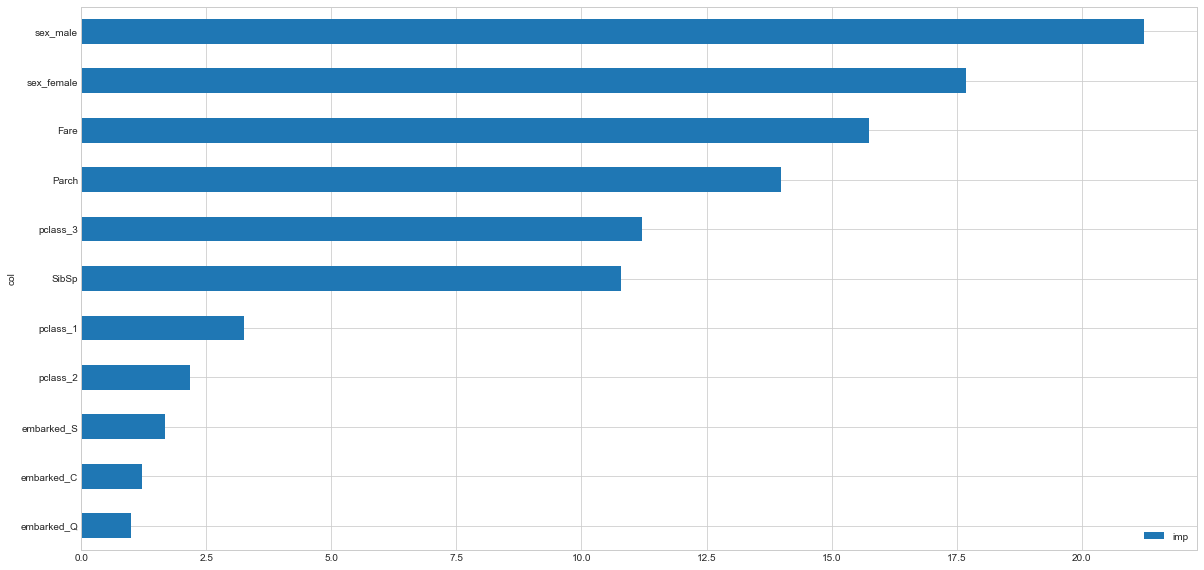

In [142]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

## Precision and Recall
Precision and recall are two metrics which are used for cases where you have have an imbalanced classification problem.

For example, you may have 100,000 people and only 1 of them gets a certain disease. If your model predicts that all people don't have the disease, it only misses 1 in 100,000 so its accuracy is 99.999%. But this isn't really helpful.

This is where precision an recall come in.

Recall = a metric which measures a models ability to find all the relevant cases in a dataset.

Recall would be the models ability to find the 1 person in 100,000 who has the disease.

Precision = a metric which measures a models ability to correctly identify only relevant instances.

In our example, Precision would be if the model found the 1 person who had the disease, did they actually have the disease.

Combining the precision and recall, gives an F1 score.

These metrics will all fall between 0 and 1, with a higher value being better.

Although, they don't necessarily need to come into play for our Titantic problem, they're worth remembering for your future work.

In [143]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8286662683284687
Recall: 0.6833382352941176
F1: 0.7489789466084935
AUC: 0.8842839467480982


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
Recall is low, this means there's a higher amount of false negatives (predicting Did not survive when it was actually Survived).

Precision is higher therefore there's less false positives (predicting Survived, when it was actually Did not survive).

Challenge: What are some ways to visualise precision and recall? Hint: You may want to look into what a confusion matrix is, you can find much more information in this blog post: 
https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

# Submission
Let's use the model with the highest cross-validation accuracy score to make a prediction on the test dataset and then submit our predictions to Kaggle.

We want to make predictions on the same kind of columnns our model is trained on.

So we have to select the subset of right columns of the test dateframe, encode them and make a prediciton with our model.

In [144]:
#We need our test dataframe to look like this one
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [145]:
# Our test dataframe has some columns our model hasn't been trained on
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [148]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [149]:
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [150]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [151]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [152]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [153]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [154]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [155]:
# What does our submission have to look like?
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [156]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [157]:
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [158]:
submission.to_csv('../catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [159]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../catboost_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# REFERENCE

In [ ]:
https://github.com/mrdbourke/your-first-kaggle-submission/blob/master/kaggle-titanic-dataset-example-submission-workflow.ipynb